In [1]:
import numpy as np
from scipy.signal import correlate
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import zscore
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Reading DFs

In [79]:
fish2_df = pd.read_csv("data/DatasetClusters/fishes/fish02/fish_02_scaled.csv")
fish2_df

#paired_df.to_csv("data/DatasetClusters/fishes/fish02/fish_02_pairs.csv",index=False)

paired_df = pd.read_csv("data/DatasetClusters/fishes/fish02/fish_02_pairs.csv")



In [80]:
def preprocess_signals(signal1, signal2):
    """Subtract the mean from each signal."""
    signal1_centered = signal1 - np.mean(signal1)
    signal2_centered = signal2 - np.mean(signal2)
    return signal1_centered, signal2_centered

# Cross corr functions

In [81]:

def calculate_cross_correlation(signal1, signal2, num_lags):
    """Calculate the cross-correlation between two signals with given lags."""
    cross_corr = correlate(signal1, signal2, mode='full')
    center = len(cross_corr) // 2
    lags = np.arange(-center, center + 1)
    relevant_corrs = cross_corr[(center-num_lags):(center+num_lags+1)]
    return relevant_corrs, lags


In [82]:

def standardize_cross_correlation(cross_correlations):
    """Standardize the cross-correlation values using Z-score."""
    standardized = zscore(cross_correlations)
    return standardized

In [83]:


def plot_cross_correlation(lags, cross_correlations):
    """Plot the cross-correlation between two signals."""
    plt.figure(figsize=(10, 4))
    plt.stem(lags, cross_correlations)
    plt.xlabel('Lags')
    plt.ylabel('Cross-Correlation')
    plt.title('Cross-Correlation between Two Signals')
    plt.show()

# Create pairs

In [84]:

red_columns = [col for col in fish2_df.columns if 'red' in col]
green_columns = [col for col in fish2_df.columns if 'green' in col]
# Creating separate DataFrames for 'red' and 'green' columns
df_red = fish2_df[red_columns]
df_green = fish2_df[green_columns]
len(df_red)

1031

In [85]:
import re

# Function to extract cluster numbers and sort columns based on that
def sorted_columns_by_cluster(df, color):
    pattern = re.compile(rf"cluster_(\d+)_({color})")
    sorted_columns = sorted(df.columns, key=lambda x: int(pattern.search(x).group(1)))
    return sorted_columns

# Extract and sort columns for red and green based on cluster number
red_columns_sorted = sorted_columns_by_cluster(df_red, 'red')
green_columns_sorted = sorted_columns_by_cluster(df_green, 'green')



In [86]:
import itertools
red_columns = df_red.columns
green_columns = df_green.columns

# Generate all possible pairs of red and green columns
all_pairs = list(itertools.product(red_columns, green_columns))

len(all_pairs)


384

In [87]:
pairs_dic = {}
for i in range(len(all_pairs)):
    pairs_dic[i] = all_pairs[i]

In [88]:
"""paired_df = pd.DataFrame()

for red_col, green_col in all_pairs:
    # Assuming each pair of columns should be concatenated side by side
    paired_data = pd.concat([df_red[red_col], df_green[green_col]], axis=1)
    
    # Optionally rename columns to reflect they are paired data
    paired_data.columns = [f'{red_col}_paired', f'{green_col}_paired']
    
    # Append the paired data to the initialized DataFrame
    paired_df = pd.concat([paired_df, paired_data], axis=1)"""

"paired_df = pd.DataFrame()\n\nfor red_col, green_col in all_pairs:\n    # Assuming each pair of columns should be concatenated side by side\n    paired_data = pd.concat([df_red[red_col], df_green[green_col]], axis=1)\n    \n    # Optionally rename columns to reflect they are paired data\n    paired_data.columns = [f'{red_col}_paired', f'{green_col}_paired']\n    \n    # Append the paired data to the initialized DataFrame\n    paired_df = pd.concat([paired_df, paired_data], axis=1)"

In [89]:
paired_df

cluster_1_red_s1_paired  cluster_1_green_s1_paired  \
0                   -0.210637                  -0.850498   
1                    0.005327                  -1.278706   
2                    0.326035                  -0.607865   
3                    0.875854                  -1.416154   
4                    0.065255                  -1.120760   
...                       ...                        ...   
1026                -0.851769                   0.260886   
1027                -0.778003                   0.902261   
1028                -1.413795                  -0.966663   
1029                -1.187163                   0.408066   
1030                -0.957862                  -0.105505   

      cluster_1_red_s1_paired.1  cluster_2_green_s1_paired  \
0                     -0.210637                   0.731234   
1                      0.005327                   0.912576   
2                      0.326035                   0.378180   
3                      0.875854                   1.774807   
4                      0.065255                   1.436819   
...                         ...                        ...   
1026                  -0.851769                   0.868904   
1027                  -0.778003                   0.420471   
1028                  -1.413795                   0.644278   
1029                  -1.187163                   0.967696   
1030                  -0.957862                   0.919566   

      cluster_1_red_s1_paired.2  cluster_3_green_s1_paired  \
0                     -0.210637                   0.005784   
1                      0.005327                   0.600644   
2                      0.326035                   0.520806   
3                      0.875854                   0.552595   
4                      0.065255                   0.699797   
...                         ...                        ...   
1026                  -0.851769                  -0.902760   
1027                  -0.778003                  -0.769632   
1028                  -1.413795                  -1.421847   
1029                  -1.187163                  -0.585294   
1030                  -0.957862                  -1.213313   

      cluster_1_red_s1_paired.3  cluster_4_green_s1_paired  \
0                     -0.210637                  -0.331898   
1                      0.005327                   0.984535   
2                      0.326035                   0.974911   
3                      0.875854                   0.685495   
4                      0.065255                   0.906697   
...                         ...                        ...   
1026                  -0.851769                  -1.429915   
1027                  -0.778003                  -1.169930   
1028                  -1.413795                  -1.840589   
1029                  -1.187163                  -0.573442   
1030                  -0.957862                  -0.935012   

      cluster_1_red_s1_paired.4  cluster_5_green_s1_paired  ...  \
0                     -0.210637                  -1.087744  ...   
1                      0.005327                   1.181213  ...   
2                      0.326035                   1.374006  ...   
3                      0.875854                   0.385875  ...   
4                      0.065255                   0.018051  ...   
...                         ...                        ...  ...   
1026                  -0.851769                  -1.734120  ...   
1027                  -0.778003                  -1.116090  ...   
1028                  -1.413795                  -1.790913  ...   
1029                  -1.187163                  -0.639640  ...   
1030                  -0.957862                  -0.763367  ...   

      cluster_8_red_s2_paired.19  cluster_8_green_s2_paired.15  \
0                      -1.099984                     -0.453258   
1                       0.290193                      0.291925   
2                      -1.647060               

# Extract pair perform cross corr

In [90]:
def plot_pair(pair):
    # Plot the data
    plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
    pair.iloc[:, 0].plot(color='red', label=pair.columns[0])   # First column in red
    pair.iloc[:, 1].plot(color='green', label=pair.columns[1]) # Second column in green
    plt.title('Plot of the First Two Columns of paired_df')
    plt.xlabel('Index')  # Adjust the label as needed
    plt.ylabel('Values')  # Adjust the label as needed
    plt.legend()  # Show legend
    plt.xlim(0, 1031)
    """plt.axvline(x=20, color='b', linestyle='--', linewidth=1) 
    plt.axvline(x=40, color='b', linestyle='--', linewidth=1) 
    plt.axvline(x=60, color='b', linestyle='--', linewidth=1) 
    plt.axvline(x=80, color='b', linestyle='--', linewidth=1) 
    plt.axvline(x=00, color='b', linestyle='--', linewidth=1)""" 
    plt.show()

In [91]:
def plot_cross_corr(lags_limited,cc_limited):
    plt.figure(figsize=(20, 5))
    plt.stem(lags_limited, cc_limited)
    plt.title('Cross-Correlation between Signal 1 and Signal 2')
    plt.xlabel('Lags')
    plt.ylabel('Cross-Correlation')
    plt.grid(True)
    plt.show()
        

In [92]:
def compute_cross_corr(pair):
    # Using the functions
    cluster_1_red_s1_paired = pair.iloc[:, 0] # Single column as 1D array
    cluster_1_green_s1_paired = pair.iloc[:, 1] # Single column as 1D array


    cross_correlation = np.correlate(cluster_1_red_s1_paired.values, cluster_1_green_s1_paired.values, mode='full')
    num_points = len(cluster_1_green_s1_paired)
    lags = np.arange(-num_points + 1, num_points)
    # Extract up to 50 lags
    max_lags = 50
    central_index = len(cross_correlation) // 2
    cc_limited = cross_correlation[(central_index - max_lags):(central_index + max_lags + 1)]
    lags_limited = lags[(central_index - max_lags):(central_index + max_lags + 1)]
    
    #Max lag
    max_correlation_value = np.max(np.abs(cc_limited))
    max_correlation_value
    max_correlation_lag = lags_limited[np.argmax(np.abs(cc_limited))]
    

    return lags_limited,cc_limited

In [93]:
def get_column_pair(df, pair_number):
    # Calculate indices for the desired pair directly from pair_number using zero-based indexing
    index1 = pair_number * 2
    index2 = index1 + 1
    
    # Check if indices are within the column range
    if index2 < len(df.columns):
        # Return the selected columns
        return df.iloc[:, index1:index2 + 1]
    else:
        # Return an empty DataFrame or raise an error if the pair number is invalid
        return pd.DataFrame()

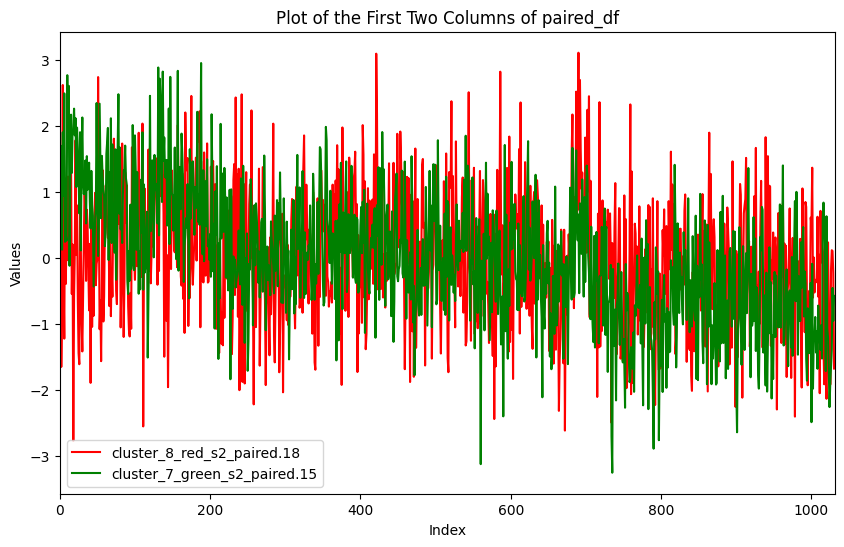

In [94]:
pair_index = 378
pair = get_column_pair(paired_df,pair_index)
plot_pair(pair)
pair.columns[0] + pair.columns[1]
l,c = compute_cross_corr(pair)

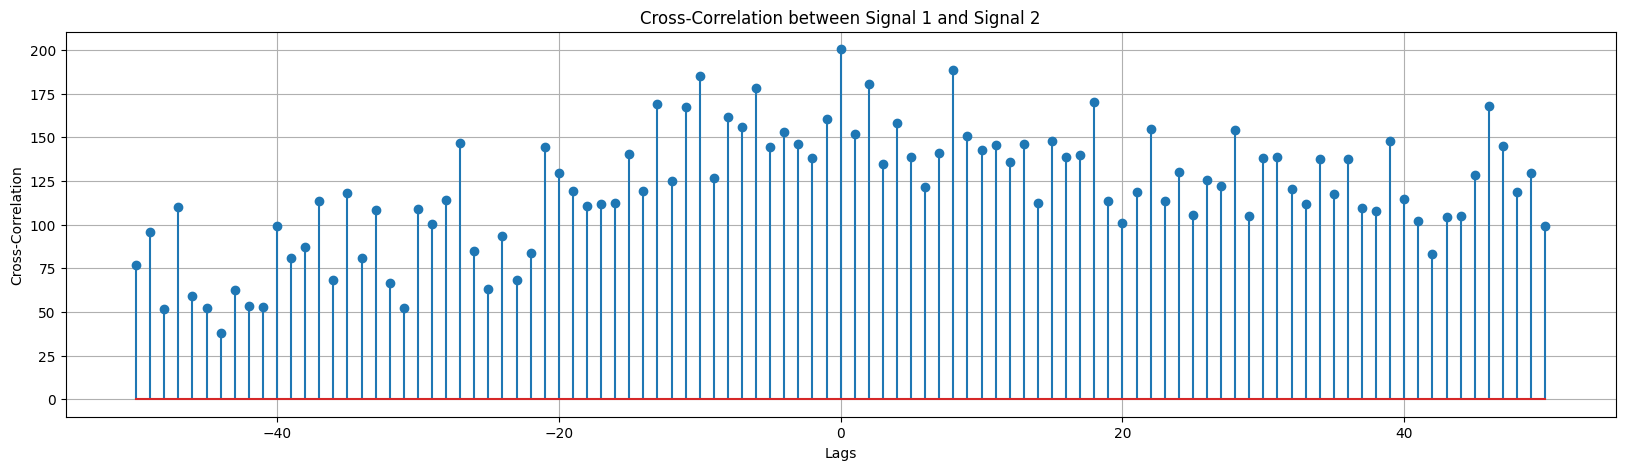

In [95]:
plot_cross_corr(l,c)

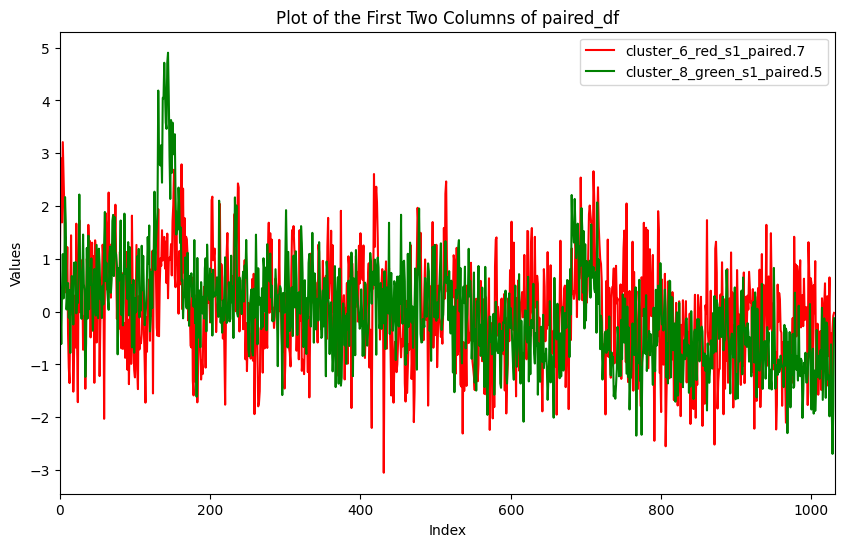

      cluster_6_red_s1_paired.7  cluster_8_green_s1_paired.5
0                      0.744477                     0.531187
1                      2.281058                     0.139506
2                      2.901666                    -0.613604
3                      1.689821                     0.444354
4                      3.210439                     1.088991
...                         ...                          ...
1026                  -0.411824                    -0.619737
1027                  -1.476151                    -1.859096
1028                  -0.335236                    -2.694060
1029                  -0.076578                    -1.802481
1030                  -0.023267                    -0.125540

[1031 rows x 2 columns]


In [96]:
pair_index = 127
pair = get_column_pair(paired_df,pair_index)
plot_pair(pair)
pair.columns[0] + pair.columns[1]
l,c = compute_cross_corr(pair)
print(pair)

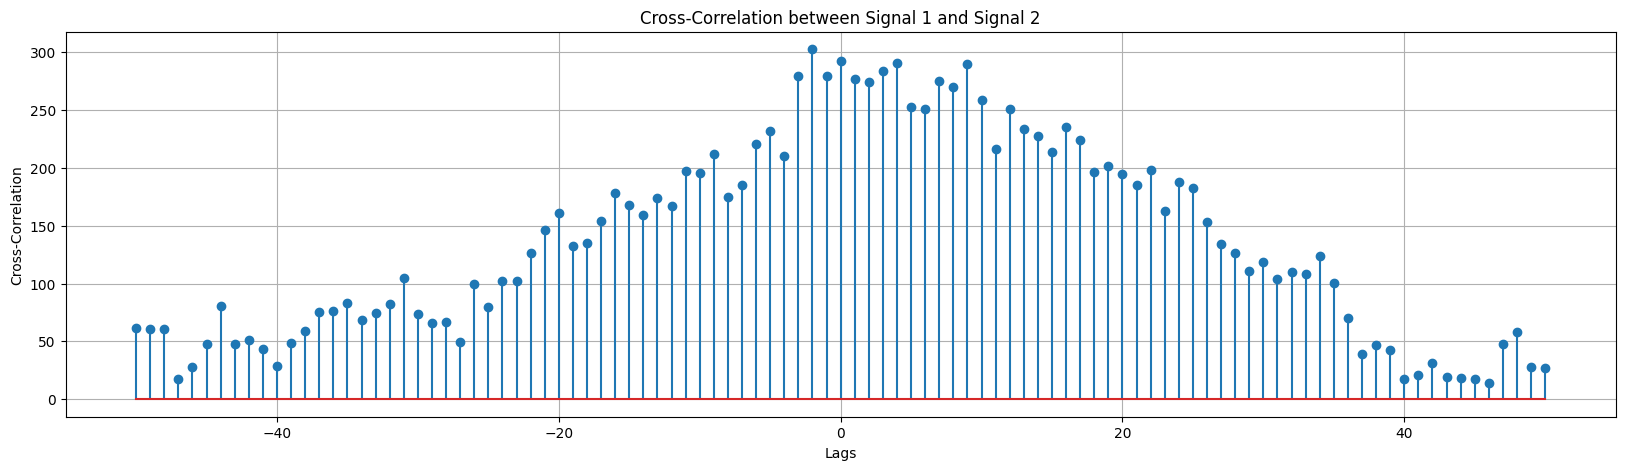

In [97]:
plot_cross_corr(l,c)

# Zscores

In [98]:
def bin_and_average(values, bin_size, min_lag, max_lag):
    # Create an array of lag indices from min_lag to max_lag
    lags = np.arange(min_lag, max_lag + 1)
    # Calculate the number of bins
    num_bins = len(values) // bin_size
    binned_values = []
    midpoints = []
    for i in range(num_bins):
        # Compute the start and end indices for the current bin
        start_index = i * bin_size
        end_index = start_index + bin_size
        # Calculate the average of the current bin
        bin_avg = np.mean(values[start_index:end_index])
        binned_values.append(bin_avg)
        # Calculate the midpoint of the lags for the current bin
        bin_midpoint = np.mean(lags[start_index:end_index])
        midpoints.append(bin_midpoint)
    return binned_values, midpoints

In [99]:
def create_z_score_df():
    PATH = "data/DatasetClusters/fishes/fish02/z_scores.csv"
    NUMBERS_OF_PAIR=384
    data_dict = {}
    data_dict_2 = {}
    
    for i in range(NUMBERS_OF_PAIR):
        pair = get_column_pair(df=paired_df,pair_number=i)
        pair_name = pair.columns[0] + "," +  pair.columns[1]
        l,c = compute_cross_corr(pair)
        binned_c,_ = bin_and_average(c, 5,l[0],l[-1])
        z = standardize_cross_correlation(binned_c)
        data_dict[i] = z
        data_dict_2[i] = binned_c
    
    z_scores_df = pd.DataFrame(data_dict)
    cross_corr_df = pd.DataFrame(data_dict_2)
    
    return z_scores_df,cross_corr_df
        

In [100]:
z_scores,cross_corr_df = create_z_score_df()
cross_corr_df

0           1           2           3           4           5    \
0    18.637859  261.562295  113.632250   -0.521249  100.135250  243.799235   
1    10.276132  237.296262  114.392212    2.018129   94.859569  141.381558   
2   -17.907461  175.826664  137.514025    3.300118   70.597784   17.041286   
3   -20.865437  153.026324  192.754408   44.106402   57.114335 -118.167344   
4    14.484747  140.553074  268.433990  102.500070   61.988937 -207.509494   
5    20.533440  112.532101  359.376189  192.791549   88.454037 -266.397596   
6    36.237800  108.459761  452.056346  264.881420  114.612712 -285.537810   
7    50.044943  125.369902  518.543659  316.407483  126.307333 -281.139026   
8    75.194018  188.121729  592.360501  396.422222  120.515404 -202.224390   
9    87.872889  263.807834  644.912670  561.009796  211.214362   -6.189404   
10   79.786568  322.164656  635.853192  611.181153  245.300311  176.310336   
11   78.850369  310.235196  532.567372  495.671447  199.928701  190.891854   
12   63.306763  260.262576  452.194210  438.783777  139.055311  240.875638   
13   57.559203  253.102743  385.875315  410.976721   94.405740  259.624228   
14   34.093548  234.263250  319.819151  347.012276   81.833258  177.774729   
15   -1.946721  185.530811  277.594466  278.150730   27.433123   73.179318   
16  -51.673733  131.080775  245.544430  231.358837   19.568001  -43.302235   
17  -94.838164   90.746554  217.183504  185.858228   36.820703 -144.384127   
18 -119.839943   55.102029  246.618625  155.610544    2.734557 -214.181522   
19 -138.656371   41.216080  274.686921  161.895413   71.809587 -217.525370   

           6           7           8           9    ...        374  \
0  -244.749051  253.368285 -158.059914  -74.702001  ...  49.392661   
1  -270.187878  220.209023 -150.792100 -124.901194  ... -42.735757   
2  -273.081094  184.264168 -166.460866 -151.288253  ...   0.615701   
3  -248.990714  165.254747 -171.834876 -167.092251  ...  -2.550923   
4  -194.382922  177.346554 -157.413036 -207.245416  ...  70.203649   
5  -109.639457  174.331947 -107.473980 -192.648299  ...  41.970762   
6   -11.676698  211.869186  -85.341327 -144.143078  ...  63.419760   
7    98.373083  264.767224  -32.757457  -89.453054  ...  78.452202   
8   209.830928  347.999172   -2.446483  -19.954381  ...  83.516650   
9   318.971435  420.461158   35.370201  163.574949  ...  50.010252   
10  372.389989  465.599854   30.674371  285.419666  ...  75.378355   
11  344.831607  493.895968  -18.052407  274.786652  ...  59.321833   
12  318.633883  488.883511  -54.688436  298.376380  ...  20.850493   
13  285.400527  463.514477  -61.959994  306.804495  ... -12.556268   
14  212.369964  462.856027  -93.714834  269.246965  ... -52.402141   
15  105.163036  415.484922 -100.829680  194.824366  ... -67.140613   
16   22.335921  364.193430 -108.796554  100.991712  ... -68.353672   
17  -43.892621  324.455957 -142.292156   25.671271  ... -27.530288   
18  -58.514139  288.108490 -173.072149  -24.632094  ... -46.601864   
19  -42.939401  252.892610 -174.182305  -17.740248  ...  17.926282   

           375         376        377         378         379        380  \
0   -66.825499   26.294232  56.801055   78.673397  -48.312457 -15.759721   
1   -94.353038   14.059785  19.448941   51.728737  -88.309804 -73.786135   
2   -72.813967   59.444258  14.991202   89.840015  -19.699791 -71.734143   
3   -54.838309   64.205295 -11.950211   85.221777   12.738907 -36.805992   
4   -56.334392   48.219384  28.981566  111.055175   70.447100  19.950883   
5   -57.273461   50.763734   5.744547   90.734097   40.900644   8.532912   
6   -21.311518   65.460309  57.838661  116.792653   82.374071  32.225802   
7   -22.799148  106.210825  63.541657  144.144457   75.060700  24.658232   
8   -11.560522   78.262263  81.380549  161.404462   65.923620  27.577489   
9    -3.344188  105.718226  67.922373  148.543748   60.205130   6.925662   
10    6.200415  132.180577  96.350936  165.127569  110.137174  43

# Clustering

In [101]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster,leaves_list

def perform_hierarchical_clustering(z_scores_df,name_image_dendo):
    # Transpose the DataFrame to make columns correspond to features
    data_transposed = z_scores_df.transpose()

    # Calculate the pairwise correlation distance matrix
    # This step translates correlation into a distance measure for clustering
    Y = pdist(data_transposed, 'correlation')

    # Perform hierarchical clustering using centroid linkage
    Z = linkage(Y, method='centroid')

    # Create a larger dendrogram to visualize the clustering
    plt.figure(figsize=(16, 180))  # Adjust the figsize parameter as needed for clarity
    dendrogram(
        Z,
        orientation='left',  # Change orientation to 'left'
        labels=data_transposed.index,
        leaf_font_size=15,  # Adjust font size to make labels readable
        distance_sort='descending',
        show_leaf_counts=True
    )
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Distance')
    plt.ylabel('Signal Pairs')
    plt.savefig(f"images/{name_image_dendo}.png")
    #plt.show()
    leaf_order = leaves_list(Z)
    ordered_columns = data_transposed.index[leaf_order]
    return Z,ordered_columns


In [102]:
"""name_image_dendo = "dendo_cross"
Z_cross,ordered_columns_cross = perform_hierarchical_clustering(cross_corr_df,name_image_dendo)"""


'name_image_dendo = "dendo_cross"\nZ_cross,ordered_columns_cross = perform_hierarchical_clustering(cross_corr_df,name_image_dendo)'

In [103]:
import seaborn as sns 
def plot_cluster_corr(data, columns,name_sorte_cross):
    """
    Plots a heatmap for the time series data of specified columns in a DataFrame.

    Args:
    data (DataFrame): The DataFrame containing the time series data.
    columns (list): List of column names whose data is to be plotted.

    Returns:
    None: Displays a heatmap of the time series.
    """

    # Extract the relevant columns and transpose for the heatmap
    cluster_data = data[columns].transpose()
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    
    # Create the heatmap
    plt.figure(figsize=(20, len(columns) / 2))  # Adjust the figure size as needed
    sns.heatmap(cluster_data, cmap=cmap, cbar=True)
    plt.title('Sorted Cross correlograms')
    plt.xlabel('Frames')
    plt.ylabel('Pairs of time series')
    plt.savefig(f"images/{name_sorte_cross}.png")
    #plt.show()

In [104]:
"""name_sorte_cross= "sorted_cross_correlegrams"
plot_cluster_corr(z_scores,ordered_columns_cross,name_sorte_cross)"""

'name_sorte_cross= "sorted_cross_correlegrams"\nplot_cluster_corr(z_scores,ordered_columns_cross,name_sorte_cross)'

# Create clustering attention

In [105]:
"""
patch_scores_df_a_rec= pd.read_csv("data/DatasetClusters/fishes/fish02/patch_scores_df_a_rec.csv")
patch_scores_df_a_rec

patch_scores_df_a_rec_10= pd.read_csv("data/DatasetClusters/fishes/fish02/patch_scores_df_a_rec_10.csv")
patch_scores_df_a_rec_10

patch_scores_df_b = pd.read_csv("data/DatasetClusters/fishes/fish02/patch_scores_df_b.csv")
patch_scores_df_b"""

'\npatch_scores_df_a_rec= pd.read_csv("data/DatasetClusters/fishes/fish02/patch_scores_df_a_rec.csv")\npatch_scores_df_a_rec\n\npatch_scores_df_a_rec_10= pd.read_csv("data/DatasetClusters/fishes/fish02/patch_scores_df_a_rec_10.csv")\npatch_scores_df_a_rec_10\n\npatch_scores_df_b = pd.read_csv("data/DatasetClusters/fishes/fish02/patch_scores_df_b.csv")\npatch_scores_df_b'

In [106]:


def perform_hierarchical_clusterin_attn(attn_score,name):
    # Transpose the DataFrame to make columns correspond to features
    data_transposed = attn_score.transpose()

    # Calculate the pairwise correlation distance matrix
    # This step translates correlation into a distance measure for clustering
    Y = pdist(data_transposed, 'correlation')

    # Perform hierarchical clustering using centroid linkage
    Z = linkage(Y, method='centroid')

    # Create a larger dendrogram to visualize the clustering
    plt.figure(figsize=(20, 180))  # Adjust the figsize parameter as needed for clarity
    dendrogram(
        Z,
        orientation='left',  # Change orientation to 'left'
        labels=data_transposed.index,
        leaf_font_size=15,  # Adjust font size to make labels readable
        distance_sort='descending',
        show_leaf_counts=True
    )
    plt.title('Hierarchical Clustering Dendrogram From CrossFormer')
    plt.xlabel('Distance')
    plt.ylabel('Signal Pairs')
    plt.savefig(f"images/{name}.png")
    #plt.show()
    
    leaf_order = leaves_list(Z)
    ordered_columns = data_transposed.index[leaf_order]
    return Z,ordered_columns

In [107]:
"""dendo_attn = "dendo_attn"
Z_attn,sorted_columns_attn = perform_hierarchical_clusterin_attn(patch_scores_df_a_rec_10,dendo_attn)"""

'dendo_attn = "dendo_attn"\nZ_attn,sorted_columns_attn = perform_hierarchical_clusterin_attn(patch_scores_df_a_rec_10,dendo_attn)'

In [108]:
def generate_patch_list(n):
    # Create the negative patches
    neg_patches = [f"-{i}-patch" for i in range(n, 0, -1)]
    # The 'synch' entry
    synch = ['synch']
    # Create the positive patches
    pos_patches = [f"{i}-patch" for i in range(1, n+1)]
    # Combine all parts into the final list
    return neg_patches + synch + pos_patches

In [109]:
l = generate_patch_list(9)
len(l)

19

In [110]:
import seaborn as sns 
def plot_cluster_exp_attn(data, columns,name):
    """
    Plots a heatmap for the time series data of specified columns in a DataFrame.

    Args:
    data (DataFrame): The DataFrame containing the time series data.
    columns (list): List of column names whose data is to be plotted.

    Returns:
    None: Displays a heatmap of the time series.
    """


    l = generate_patch_list(4)
    #l = reversed_list = l[::-1]
    
    # Extract the relevant columns and transpose for the heatmap
    cluster_data = data[columns].transpose()
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    
    # Create the heatmap
    plt.figure(figsize=(20, len(columns) / 2))  # Adjust the figure size as needed
    sns.heatmap(cluster_data, cmap=cmap, cbar=True,vmin=0, vmax=1,xticklabels=l)
    plt.title('Heatmap of Time Series in Cluster 35')
    plt.xlabel('Time Steps')
    plt.ylabel('Series in Cluster 35')
    plt.savefig(f"images/{name}.png")
    #plt.show()


In [111]:
"""name_sorte_attn= "sorted_attn"
plot_cluster_exp_attn(patch_scores_df_a_rec_10,sorted_columns_attn,name_sorte_attn)"""

'name_sorte_attn= "sorted_attn"\nplot_cluster_exp_attn(patch_scores_df_a_rec_10,sorted_columns_attn,name_sorte_attn)'

In [112]:
l = generate_patch_list(9)
reversed_list = l[::-1]
reversed_list

['9-patch',
 '8-patch',
 '7-patch',
 '6-patch',
 '5-patch',
 '4-patch',
 '3-patch',
 '2-patch',
 '1-patch',
 'synch',
 '-1-patch',
 '-2-patch',
 '-3-patch',
 '-4-patch',
 '-5-patch',
 '-6-patch',
 '-7-patch',
 '-8-patch',
 '-9-patch']

## Heatmap

In [113]:

#heat_scores_df_rec_10= pd.read_csv("data/DatasetClusters/fishes/fish02/attn_scores_df_rec_10.csv")



In [114]:

def perform_hierarchical_clusterin_heat(attn_score,name):
    # Transpose the DataFrame to make columns correspond to features
    data_transposed = attn_score.transpose()

    # Calculate the pairwise correlation distance matrix
    # This step translates correlation into a distance measure for clustering
    Y = pdist(data_transposed, 'correlation')

    # Perform hierarchical clustering using centroid linkage
    Z = linkage(Y, method='complete')

    # Create a larger dendrogram to visualize the clustering
    plt.figure(figsize=(20, 180))  # Adjust the figsize parameter as needed for clarity
    dendrogram(
        Z,
        orientation='left',  # Change orientation to 'left'
        labels=data_transposed.index,
        leaf_font_size=15,  # Adjust font size to make labels readable
        distance_sort='descending',
        show_leaf_counts=True
    )
    plt.title('Hierarchical Clustering Dendrogram From CrossFormer')
    plt.xlabel('Distance')
    plt.ylabel('Signal Pairs')
    plt.savefig(f"images/{name}.png")
    #plt.show()
    
    leaf_order = leaves_list(Z)
    ordered_columns = data_transposed.index[leaf_order]
    return Z,ordered_columns

In [115]:
"""name_dendo_heat_attn= "dendo_heat_attn"
Z_heat,ordered_columns_heat = perform_hierarchical_clusterin_heat(heat_scores_df_rec_10,name_dendo_heat_attn)"""

'name_dendo_heat_attn= "dendo_heat_attn"\nZ_heat,ordered_columns_heat = perform_hierarchical_clusterin_heat(heat_scores_df_rec_10,name_dendo_heat_attn)'

In [116]:
import seaborn as sns 
def plot_cluster_heat(data, columns,name):
    """
    Plots a heatmap for the time series data of specified columns in a DataFrame.

    Args:
    data (DataFrame): The DataFrame containing the time series data.
    columns (list): List of column names whose data is to be plotted.

    Returns:
    None: Displays a heatmap of the time series.
    """

    # Extract the relevant columns and transpose for the heatmap
    cluster_data = data[columns].transpose()
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    
    # Create the heatmap
    plt.figure(figsize=(20, len(columns) / 2))  # Adjust the figure size as needed
    sns.heatmap(cluster_data, cmap=cmap, cbar=True)
    plt.title('Sorted Cross correlograms')
    plt.xlabel('Frames')
    plt.ylabel('Pairs of time series')
    plt.savefig(f"images/{name}.png")
    #plt.show()

In [117]:
"""name_heat_attn= "sorted_heat"
plot_cluster_heat(heat_scores_df_rec_10,ordered_columns_heat,name_heat_attn)"""

'name_heat_attn= "sorted_heat"\nplot_cluster_heat(heat_scores_df_rec_10,ordered_columns_heat,name_heat_attn)'

# RUN clustering

### CORR

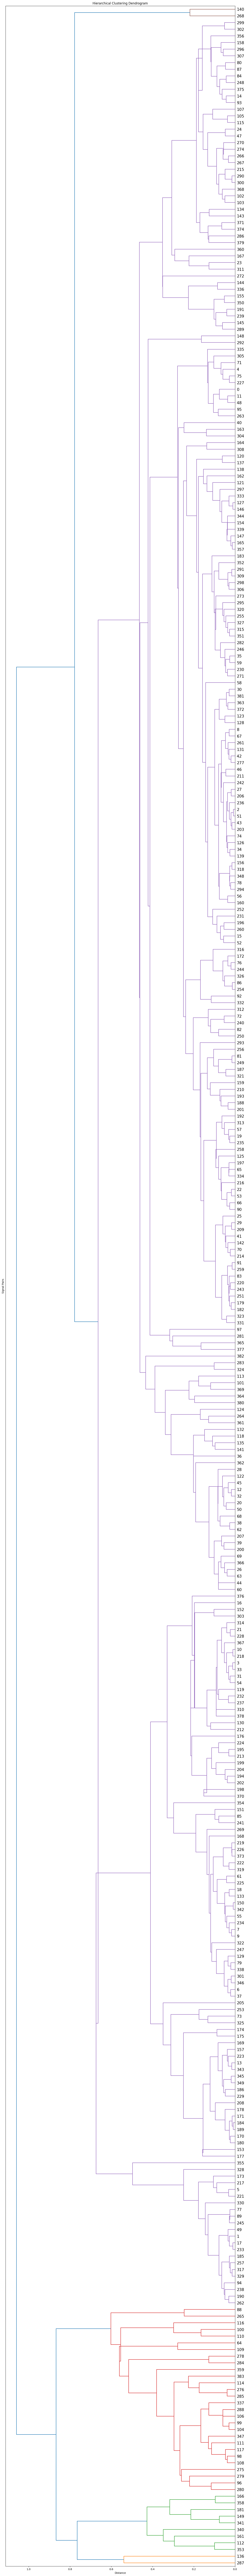

In [118]:
name_image_dendo = "cross/dendo_cross"
Z_cross,ordered_columns_cross = perform_hierarchical_clustering(cross_corr_df,name_image_dendo)


In [119]:
Z_cross.shape

(383, 4)

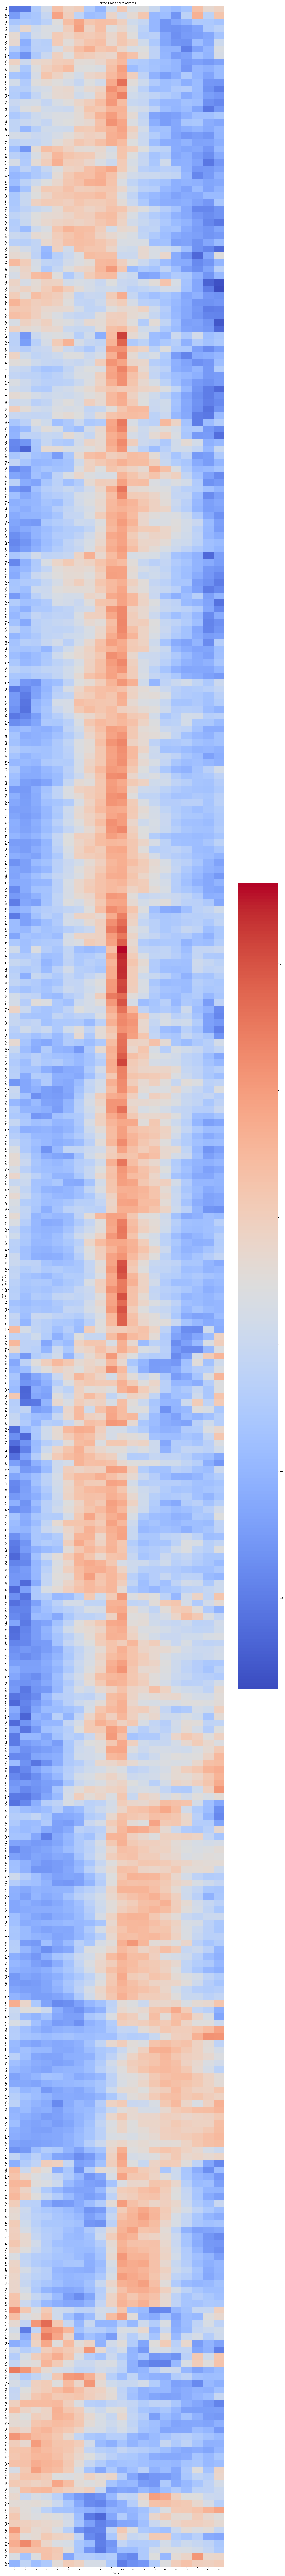

In [120]:
name_sorte_cross= "cross/sorted_cross_correlegrams"
plot_cluster_corr(z_scores,ordered_columns_cross,name_sorte_cross)

In [121]:
ordered_columns_cross = list(ordered_columns_cross)

## Some post filtering

In [122]:
def standardize_attention(df):
    """Standardize the cross-correlation values in a DataFrame using Z-score."""
    # Applying zscore to each column. The `axis=0` argument standardizes along columns.
    standardized_df = df.apply(zscore, axis=0)
    
    # Optionally, you can handle NaN values if your data contains missing values
    # which can result from columns having the same value and thus a standard deviation of zero.
    standardized_df = standardized_df.fillna(0)
    
    return standardized_df

In [123]:
from sklearn.preprocessing import QuantileTransformer

def quantile_transform_data(df, output_dist='normal'):
    transformer = QuantileTransformer(output_distribution=output_dist, random_state=0)
    quantile_transformed_df = pd.DataFrame(transformer.fit_transform(df), columns=df.columns)
    return quantile_transformed_df

In [124]:
def rolling_quantile_transform(df, window_size=10, output_dist='normal', n_quantiles=19):
    # Initialize the transformer with a specified number of quantiles
    transformer = QuantileTransformer(output_distribution=output_dist, n_quantiles=n_quantiles, random_state=0)

    # Placeholder for transformed data
    transformed_data = pd.DataFrame(index=df.index, columns=df.columns)

    # Apply transformation in rolling windows
    for start in range(0, len(df), window_size):
        end = start + window_size
        # Slice the DataFrame to the current window
        current_data = df[start:end]
        # Ensure the transformer's n_quantiles does not exceed the number of samples
        effective_quantiles = min(n_quantiles, len(current_data))
        transformer.n_quantiles = effective_quantiles
        # Transform the data in the current window and replace in the placeholder DataFrame
        transformed_data.iloc[start:end] = transformer.fit_transform(current_data)
    
    return transformed_data

In [125]:
def combined_quantile_moving_average_same_window(df, window_size=10, output_dist='normal', n_quantiles=10):
    # Initialize the Quantile Transformer with a specified number of quantiles
    transformer = QuantileTransformer(output_distribution=output_dist, n_quantiles=n_quantiles, random_state=0)

    # Placeholder DataFrame for the final transformed data
    transformed_data = pd.DataFrame(index=df.index, columns=df.columns)

    # Apply transformation and moving average within the same window
    for start in range(0, len(df), window_size):
        end = start + window_size
        # Slice the DataFrame to the current window
        current_data = df[start:end]

        # Adjust n_quantiles to match the number of samples in the window if necessary
        effective_quantiles = min(n_quantiles, len(current_data))
        transformer.n_quantiles = effective_quantiles

        # Fit and transform the data in the current window
        quantile_transformed = transformer.fit_transform(current_data)
        quantile_transformed_df = pd.DataFrame(quantile_transformed, index=current_data.index, columns=df.columns)

        # Apply the moving average filter to the quantile-transformed data in the same window
        moving_average_df = quantile_transformed_df.rolling(window=window_size, min_periods=1, center=True).mean()

        # Assign the moving averaged data back to the placeholder DataFrame
        transformed_data.iloc[start:end] = moving_average_df

    return transformed_data

In [126]:
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import RobustScaler

def process_data_window(df, window_size=10, winsor_limits=(0.05, 0.05)):
    scaler = RobustScaler()
    processed_data = pd.DataFrame(index=df.index, columns=df.columns)

    for start in range(0, len(df), window_size):
        end = start + window_size
        window_data = df[start:end]

        # Winsorize data to limit extreme values
        winsorized_data = window_data.apply(lambda x: winsorize(x, limits=winsor_limits), axis=0)
        
        # Apply robust scaling
        scaled_data = scaler.fit_transform(winsorized_data)
        processed_data.iloc[start:end] = scaled_data

    return processed_data

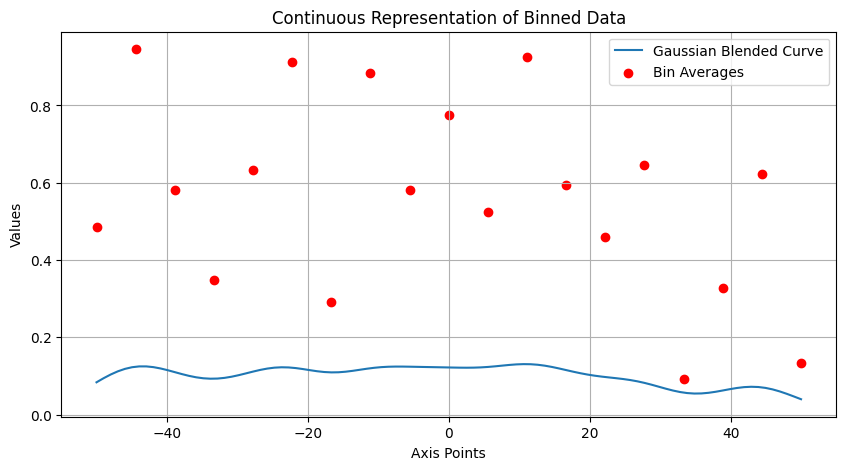

In [127]:
import numpy as np
import matplotlib.pyplot as plt

# Example bin averages (assuming you have these values)
bin_averages = np.random.rand(19)  # Random data, replace with your actual bin averages
bin_centers = np.linspace(-50, 50, num=19)  # Equally spaced bin centers from -50 to 50

# Define the Gaussian function
def gaussian(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))

# Parameters for the Gaussian kernels
sigma = 5  # Standard deviation of the Gaussians

# Points on the axis
x_values = np.linspace(-50, 50, 100)  # 1000 points from -50 to 50

# Calculate the Gaussian blend
y_values = np.zeros_like(x_values)
for mu, avg in zip(bin_centers, bin_averages):
    y_values += avg * gaussian(x_values, mu, sigma)

# Plotting the result
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, label='Gaussian Blended Curve')
plt.scatter(bin_centers, bin_averages, color='red', label='Bin Averages')  # Mark the bin centers
plt.title('Continuous Representation of Binned Data')
plt.xlabel('Axis Points')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


In [128]:

def redistribute_outliers(row, threshold=0.6):
    # Iterate through each cell in the row
    for idx, value in enumerate(row):
        if value > threshold:
            # Calculate the amount to redistribute
            redistribute_amount = value * 0.3  # 10% of the outlier value
            # Dampen the outlier
            row[idx] -= redistribute_amount

            # Find indices of non-NaN neighbors
            non_nan_indices = [i for i in range(len(row)) if not np.isnan(row[i]) and i != idx]
            # Calculate weights decreasing with distance from the outlier
            weights = np.exp(-0.5 * np.abs(np.array(non_nan_indices) - idx))
            weights /= weights.sum()  # Normalize weights

            # Redistribute the amount to non-NaN neighbors
            for neighbor_idx, weight in zip(non_nan_indices, weights):
                if (row[neighbor_idx] < 0.3):
                    row[neighbor_idx] += redistribute_amount * weight

    return row

In [ ]:
# Function to apply custom robust scaling
def custom_robust_scale(column):
    median = column.median()
    q3 = column.quantile(0.80)
    modified_iqr = q3 - median  # Custom IQR focusing only on the upper half
    return (column - median) / modified_iqr

## EXP ATTN

In [129]:
#patch_scores_df_a_lin_dec = pd.read_csv("data/DatasetClusters/fishes/fish02/patch_scores_df_a_lin_dec.csv")
#patch_scores_df_a_base= pd.read_csv("data/DatasetClusters/fishes/fish02/patch_scores_df_a_base.csv")
##patch_scores_df_a_no_overlap = pd.read_csv("data/DatasetClusters/fishes/fish02/patch_scores_df_a_no_overlap.csv")
#patch_scores_df_a_base_90 =  pd.read_csv("data/DatasetClusters/fishes/fish02/patch_scores_df_a_base_90.csv")
#patch_scores_df_b_base_90 =  pd.read_csv("data/DatasetClusters/fishes/fish02/patch_scores_df_b_base_90.csv")
#patch_scores_df_a_base_mae = pd.read_csv("data/DatasetClusters/fishes/fish02/patch_scores_df_a_base_mae.csv")
#patch_scores_df_a_base_overfit =  pd.read_csv("data/DatasetClusters/fishes/fish02/patch_scores_df_a_base_overfit.csv")
#patch_scores_df_a_auto =  pd.read_csv("data/DatasetClusters/fishes/fish02/patch_scores_df_a_auto.csv")

#patch_scores_df_a_base_mae.hea

#patch_scores_df_a_auto_bigger_patch = pd.read_csv("data/DatasetClusters/fishes/fish02/patch_scores_df_a_auto_bigger_patch.csv")
#patch_scores_df_a_1_head_300_2 = pd.read_csv("data/DatasetClusters/fishes/fish02/patch_scores_df_a_1_head_300_2.csv")
#patch_scores_df_a_base_TSA = pd.read_csv("data/DatasetClusters/fishes/fish02/patch_scores_df_a_base_TSA.csv")
#atch_scores_df_a_auto_bigger_patch
#patch_scores_df_a_base
#patch_scores_df_a_auto_bigger_patch

#patch_scores_df_a_base_mean = pd.read_csv("data/DatasetClusters/fishes/fish02/patch_scores_df_a_base.csv")

#patch_scores_df_a_base_indp = process_data_window(patch_scores_df_a_base_win)
#patch_scores_df_a_auto_bigger_patch =patch_scores_df_a_auto_bigger_patch.apply(redistribute_outliers,axis=0)
#patch_scores_df_a_base_overfit
#patch_scores_df_a_no_overlap

#patch_scores_df_a_base = pd.read_csv("data/DatasetClusters/fishes/fish02/patch_scores_df_a_base.csv")

patch_scores_df_a_base_2_head =  pd.read_csv("data/DatasetClusters/fishes/fish02/patch_scores_df_a_base_2_head.csv")

In [130]:
patch_scores_df_a_base_2_head

0         1         2         3         4         5         6  \
0   0.496023  0.081158  0.015557  0.013318  0.104368  0.255177  0.074697   
1   0.057230  0.052698  0.051265  0.010043  0.091618  0.020992  0.104380   
2   0.075959  0.113966  0.051515  0.016679  0.090012  0.233195  0.107330   
3   0.052235  0.118123  0.032197  0.085904  0.043216  0.101802  0.089140   
4   0.043398  0.051380  0.054996  0.062626  0.094353  0.047361  0.092121   
5   0.084089  0.070007  0.054190  0.057738  0.069850  0.033301  0.064884   
6   0.084876  0.081939  0.045270  0.054934  0.055851  0.086109  0.113306   
7   0.082074  0.160990  0.053108  0.087819  0.080311  0.224407  0.104263   
8   0.132897  0.198067  0.088437  0.078894  0.152133  0.123234  0.115302   
9   0.101142  0.122494  0.369093  0.482118  0.168978  0.093126  0.188871   
10  0.138665  0.091455  0.214932  0.074026  0.132548  0.022509  0.107293   
11  0.113032  0.050107  0.037184  0.072570  0.159587  0.029245  0.072705   
12  0.078088  0.046588  0.029997  0.051177  0.039836  0.051549  0.067755   
13  0.094685  0.090811  0.023303  0.042119  0.046892  0.054920  0.077935   
14  0.146269  0.103008  0.060280  0.023054  0.037296  0.267097  0.075092   
15  0.073096  0.059067  0.014849  0.037317  0.087756  0.198971  0.093034   
16  0.090938  0.078136  0.213586  0.035569  0.121276  0.117818  0.084184   
17  0.071333  0.094188  0.070398  0.025507  0.160837  0.045026  0.035710   
18  0.066774  0.184055  0.045831  0.015065  0.033367  0.019269  0.073670   

           7         8         9  ...       374       375       376       377  \
0   0.080970  0.126887  0.210632  ...  0.035196  0.072270  0.130100  0.088556   
1   0.103444  0.088342  0.064104  ...  0.071388  0.057526  0.059078  0.143248   
2   0.223583  0.066493  0.110494  ...  0.057672  0.107124  0.058345  0.050601   
3   0.083721  0.073873  0.126726  ...  0.070745  0.069980  0.108571  0.165542   
4   0.052914  0.085452  0.096127  ...  0.055165  0.095401  0.118156  0.100374   
5   0.052018  0.111114  0.098513  ...  0.053290  0.106976  0.101172  0.065018   
6   0.056797  0.120837  0.084178  ...  0.172240  0.114676  0.119156  0.093422   
7   0.100078  0.105896  0.073660  ...  0.067047  0.100338  0.078246  0.136544   
8   0.133365  0.096025  0.072343  ...  0.147819  0.119829  0.112767  0.121487   
9   0.176925  0.107582  0.102281  ...  0.089635  0.082144  0.097389  0.103751   
10  0.113119  0.056599  0.124916  ...  0.109508  0.102681  0.096914  0.095530   
11  0.068567  0.080491  0.142092  ...  0.112763  0.144793  0.125698  0.061025   
12  0.065118  0.096735  0.130208  ...  0.094423  0.079603  0.105169  0.057499   
13  0.048176  0.121295  0.067183  ...  0.148537  0.151623  0.102371  0.063427   
14  0.154292  0.145395  0.136799  ...  0.092410  0.064480  0.097159  0.196270   
15  0.083059  0.072944  0.069739  ...  0.064672  0.100560  0.083572  0.124603   
16  0.108311  0.135640  0.078644  ...  0.116788  0.074437  0.079936  0.092954   
17  0.075461  0.192143  0.045213  ...  0.129813  0.030026  0.063158  0.064624   
18  0.071040  0.106244  0.033787  ...  0.031098  0.029751  0.081332  0.022916   

         378       379       380       381       382       383  
0   0.342718  0.054752  0.153018  0.047589  0.403230  0.076199  
1   0.034775  0.034416  0.069042  0.041443  0.031176  0.085250  
2   0.056916  0.055116  0.103700  0.053470  0.075436  0.212041  
3   0.053592  0.045005  0.090373  0.052122  0.082136  0.054037  
4   0.061130  0.119893  0.101936  0.139693  0.068378  0.088637  
5   0.079856  0.087085  0.099827  0.055037  0.255300  0.072666  
6   0.106275  0.082679  0.066335  0.060579  0.067263  0.092417  
7   0.121737  0.118604  0.098569  0.103423  0.112530  0.073642  
8   0.124166  0.113041  0.109096  0.143075  0.104558  0.071381  
9   0.092919  0.163501  0.079570  0.182919  0.096492  0.098933  
10  0.083182  0.162922  0.123131  0.158850  0.113989  0.139445  
11  0.118362  0.083346  0.082348  0.089733  0.109003  0.118797  
12  0.157584  0.068609  

In [131]:
generate_patch_list(9)

['-9-patch',
 '-8-patch',
 '-7-patch',
 '-6-patch',
 '-5-patch',
 '-4-patch',
 '-3-patch',
 '-2-patch',
 '-1-patch',
 'synch',
 '1-patch',
 '2-patch',
 '3-patch',
 '4-patch',
 '5-patch',
 '6-patch',
 '7-patch',
 '8-patch',
 '9-patch']

In [132]:
import os

FOLDER_NAME = "patch_scores_df_a_base_2_head"


In [133]:

# Check if the folder exists
if not os.path.exists(FOLDER_NAME):
    # If it doesn't exist, create the folder
    os.makedirs(f'images/{FOLDER_NAME}')
    print(f"Folder '{FOLDER_NAME}' created.")
else:
    print(f"Folder '{FOLDER_NAME}' already exists.")

FileExistsError: [Errno 17] File exists: 'images/patch_scores_df_a_base_2_head'

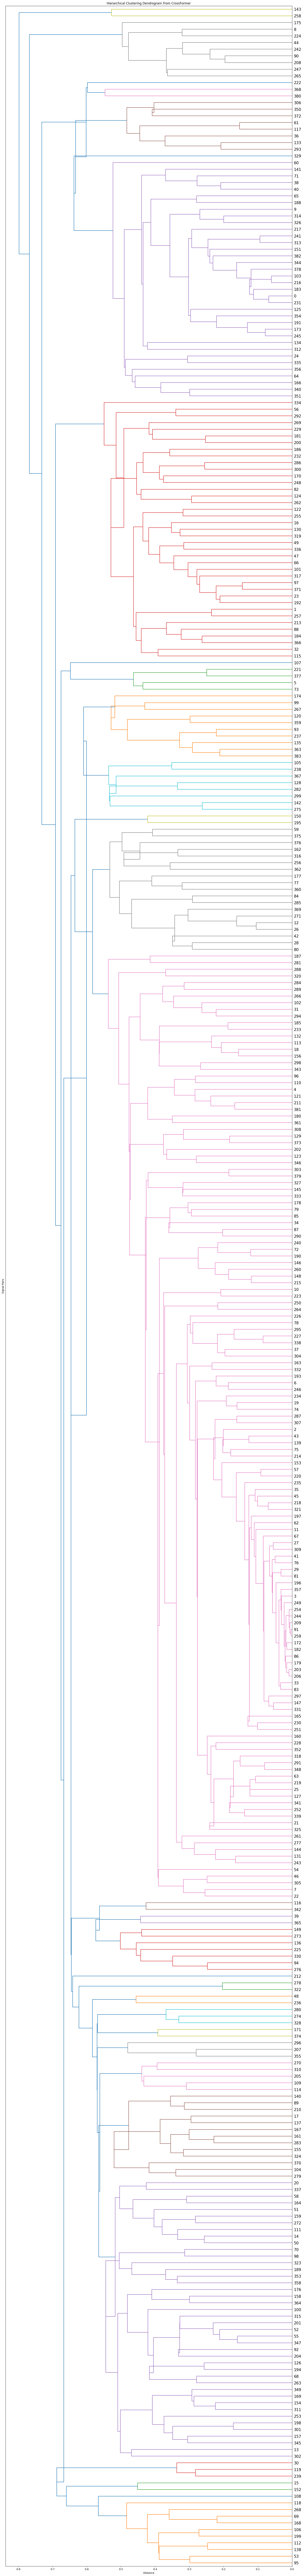

In [134]:
dendo_attn = f"{FOLDER_NAME}/dendo_attn_rob"
Z_attn,sorted_columns_attn = perform_hierarchical_clusterin_attn(patch_scores_df_a_base_2_head,dendo_attn)

In [135]:
Z_attn.shape

(383, 4)

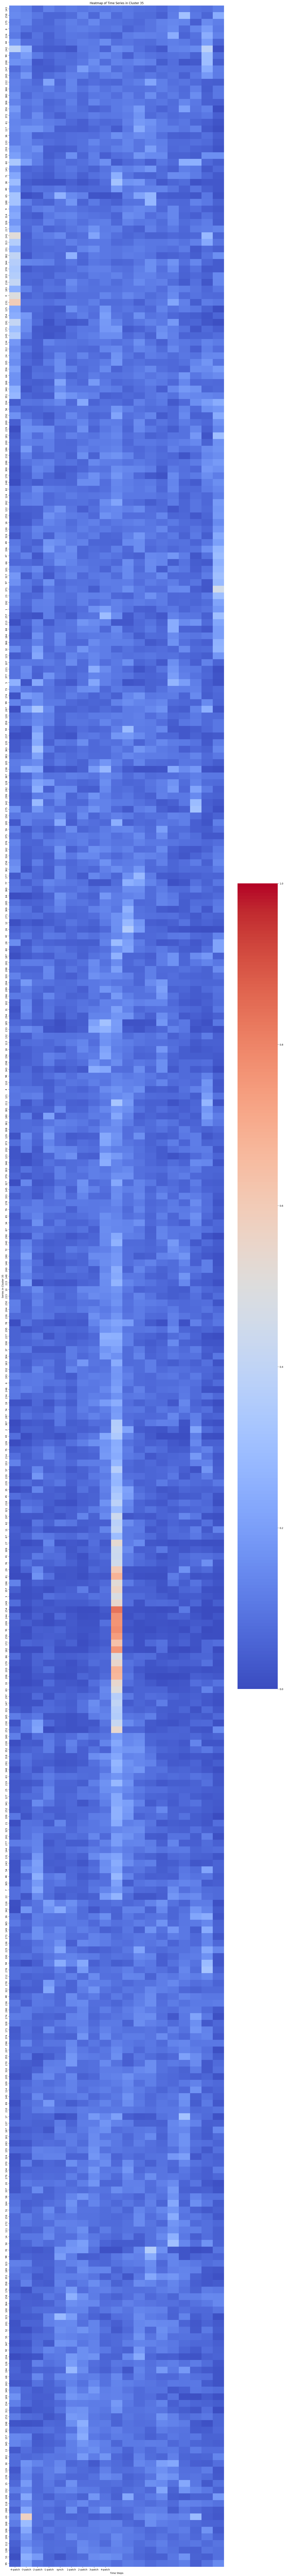

In [136]:
name_sorte_attn= f"{FOLDER_NAME}/sorted_attn_rob"
plot_cluster_exp_attn(patch_scores_df_a_base_2_head,sorted_columns_attn,name_sorte_attn)

### HEAT

In [137]:

heat_scores_df_a_base= pd.read_csv("data/DatasetClusters/fishes/fish02/attn_scores_a_base.csv")
heat_scores_df_a_base

0         1         2             3         4         5  \
0     0.000013  0.464007  0.013416  1.000000e+00  0.006976  0.000374   
1     0.000037  0.012241  0.588033  9.321960e-10  0.947316  0.000004   
2     0.034371  0.002660  0.020027  1.596487e-08  0.001310  0.000173   
3     0.025706  0.002130  0.035649  6.251322e-10  0.000004  0.001351   
4     0.002355  0.061417  0.005950  1.308117e-08  0.002910  0.000919   
...        ...       ...       ...           ...       ...       ...   
1995  0.893531  0.001216  0.000172  2.191242e-04  0.000241  0.001778   
1996  0.004458  0.216290  0.096556  4.389620e-03  0.062736  0.904294   
1997  0.030009  0.108384  0.023158  3.941174e-02  0.090078  0.034664   
1998  0.039599  0.453776  0.003563  2.566036e-02  0.000097  0.030336   
1999  0.000592  0.007139  0.826981  9.218047e-01  0.001602  0.001701   

             6         7         8         9  ...       374       375  \
0     0.881356  0.999321  0.530240  0.313429  ...  0.113152  0.075532   
1     0.055454  0.000397  0.078868  0.428948  ...  0.110525  0.000873   
2     0.003819  0.000088  0.068304  0.129519  ...  0.088036  0.002899   
3     0.020643  0.000044  0.000398  0.000816  ...  0.006015  0.022833   
4     0.003636  0.000006  0.008019  0.006231  ...  0.003930  0.751365   
...        ...       ...       ...       ...  ...       ...       ...   
1995  0.295834  0.041593  0.038147  0.000037  ...  0.013746  0.023067   
1996  0.412245  0.008542  0.005316  0.001911  ...  0.000370  0.049167   
1997  0.253985  0.059400  0.003742  0.001762  ...  0.577764  0.012940   
1998  0.004713  0.084421  0.023445  0.000014  ...  0.006493  0.053139   
1999  0.022360  0.038478  0.026304  0.000020  ...  0.000005  0.004873   

           376       377       378       379       380       381       382  \
0     0.107497  0.004072  0.159921  0.111994  0.387747  0.129136  0.296560   
1     0.064606  0.000096  0.008318  0.656850  0.055791  0.084448  0.000090   
2     0.009683  0.000024  0.105393  0.005144  0.129106  0.559889  0.002224   
3     0.766169  0.000055  0.039208  0.004899  0.147969  0.021473  0.009091   
4     0.002868  0.000100  0.060259  0.159925  0.074670  0.055392  0.008387   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.011645  0.021774  0.002158  0.034781  0.007138  0.014311  0.054332   
1996  0.020405  0.011547  0.024620  0.034470  0.006418  0.005900  0.000573   
1997  0.003159  0.111857  0.103261  0.000624  0.022562  0.000090  0.000267   
1998  0.022710  0.170386  0.062557  0.345255  0.058716  0.786457  0.000663   
1999  0.717209  0.112590  0.009912  0.114515  0.305504  0.001019  0.938350   

           383  
0     0.012155  
1     0.079677  
2     0.059940  
3     0.158936  
4     0.016590  
...        ...  
1995  0.118691  
1996  0.019064  
1997  0.128974  
1998  0.040291  
1999  0.015255  

[2000 rows x 384 columns]

In [138]:
Q1 = np.percentile(heat_scores_df_a_base, 25)
Q3 = np.percentile(heat_scores_df_a_base, 75)

In [139]:
#heat_scores_df_a_base = process_data_window(heat_scores_df_a_base)


In [140]:
#name_dendo_heat_attn= "dendo_heat_attn"
#Z_heat,ordered_columns_heat = perform_hierarchical_clusterin_heat(heat_scores_df_a_base,name_dendo_heat_attn)

In [141]:
name_heat_attn= "sorted_heat"
#plot_cluster_heat(heat_scores_df_a_base,ordered_columns_heat,name_heat_attn)

## Different index

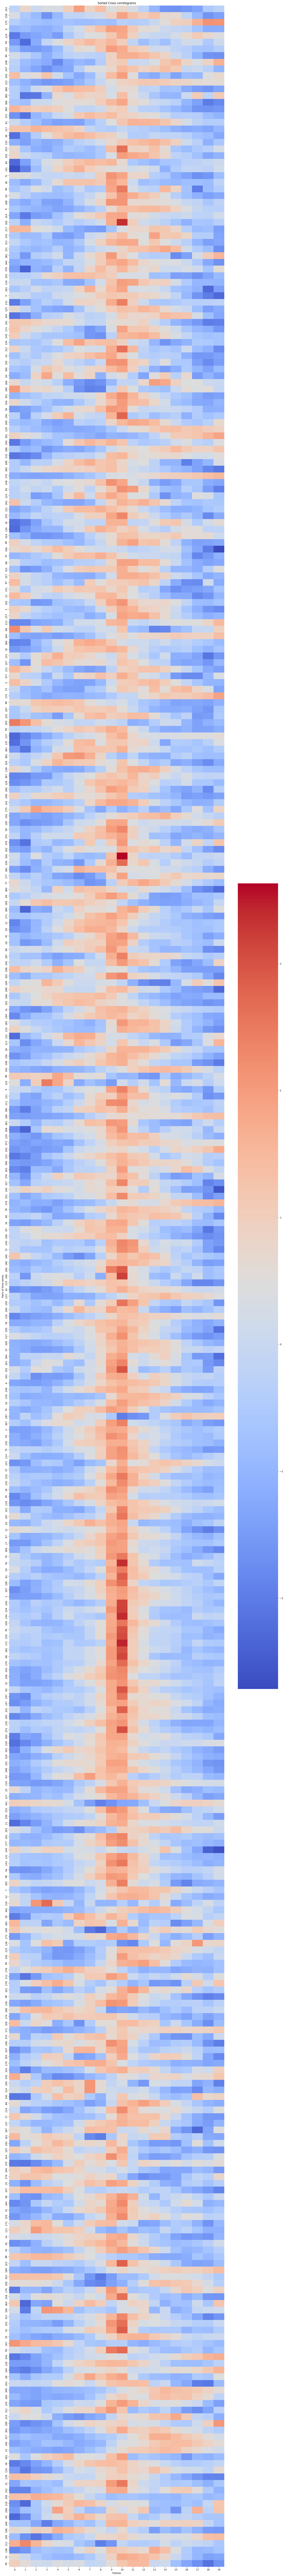

In [142]:
name_sorte_cross= f"{FOLDER_NAME}/cross_sorted_by_attn"
sorted_columns_attn_ind = [int(i) for i in sorted_columns_attn]

plot_cluster_corr(z_scores,sorted_columns_attn_ind,name_sorte_cross)

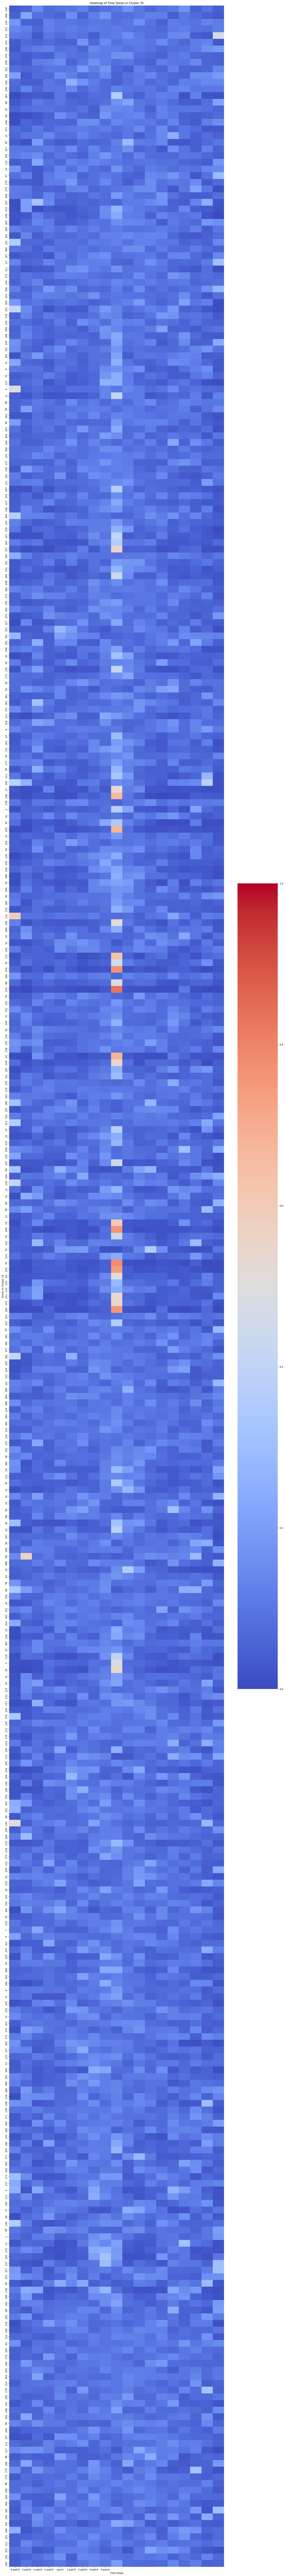

In [143]:
name_sorte_cross=  f"{FOLDER_NAME}/attn_sorted_by_cross"
sorted_columns_cross_ind = [str(i) for i in ordered_columns_cross]

plot_cluster_exp_attn(patch_scores_df_a_base_2_head,sorted_columns_cross_ind,name_sorte_cross)

In [144]:
name_sorte_cross= "cross_sorted_by_attn_sorted_heat_attn_WIN"

sorted_columns_heat_ind = [int(i) for i in ordered_columns_heat]
plot_cluster_corr(z_scores,sorted_columns_heat_ind,name_sorte_cross)

NameError: name 'ordered_columns_heat' is not defined

## Clusters analysis

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
from matplotlib.colors import ListedColormap

def plot_clusters(Z,labels, cut_method='maxclust', cut_value=5):
    """
    Plots the clusters from a hierarchical clustering given a linkage matrix Z.
    
    Parameters:
    - Z: Linkage matrix from hierarchical clustering.
    - cut_method: Method to cut the dendrogram ('maxclust' for maximum clusters or 'distance' for maximum distance).
    - cut_value: Value to cut the dendrogram. Number of clusters if cut_method is 'maxclust' or distance if 'distance'.
    """
    
    # Determine clusters from the linkage matrix
    if cut_method == 'maxclust':
        clusters = fcluster(Z, t=cut_value, criterion='maxclust')
    elif cut_method == 'distance':
        clusters = fcluster(Z, t=cut_value, criterion='distance')
    else:
        raise ValueError("Invalid cut method. Use 'maxclust' or 'distance'.")
    
    # Number of unique clusters
    num_clusters = len(np.unique(clusters))
    print(f"Total number of clusters: {num_clusters}")

    # Create a scatter plot with a high contrast colormap
    plt.figure(figsize=(40, 10))
    colors = plt.get_cmap('tab20b')(np.linspace(0, 1, num_clusters))
    cmap = ListedColormap(colors)

    for i, cluster in enumerate(np.unique(clusters)):
        # Get indices for data points in the current cluster
        idx = np.where(clusters == cluster)[0]
        # Create a small spread in y-values within the same cluster
        y_values = np.random.normal(i / 10, 0.01, size=len(idx))
        plt.scatter(labels[idx], y_values, color=colors[i % 20], label=f'Cluster {cluster}', s=50)

    plt.title('Cluster Distribution with Label Spread and High Contrast')
    plt.xlabel('Original Label Index')
    plt.ylabel('Random Offset within Cluster')
    plt.legend(title="Cluster Number", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()
    
    return clusters

Total number of clusters: 12


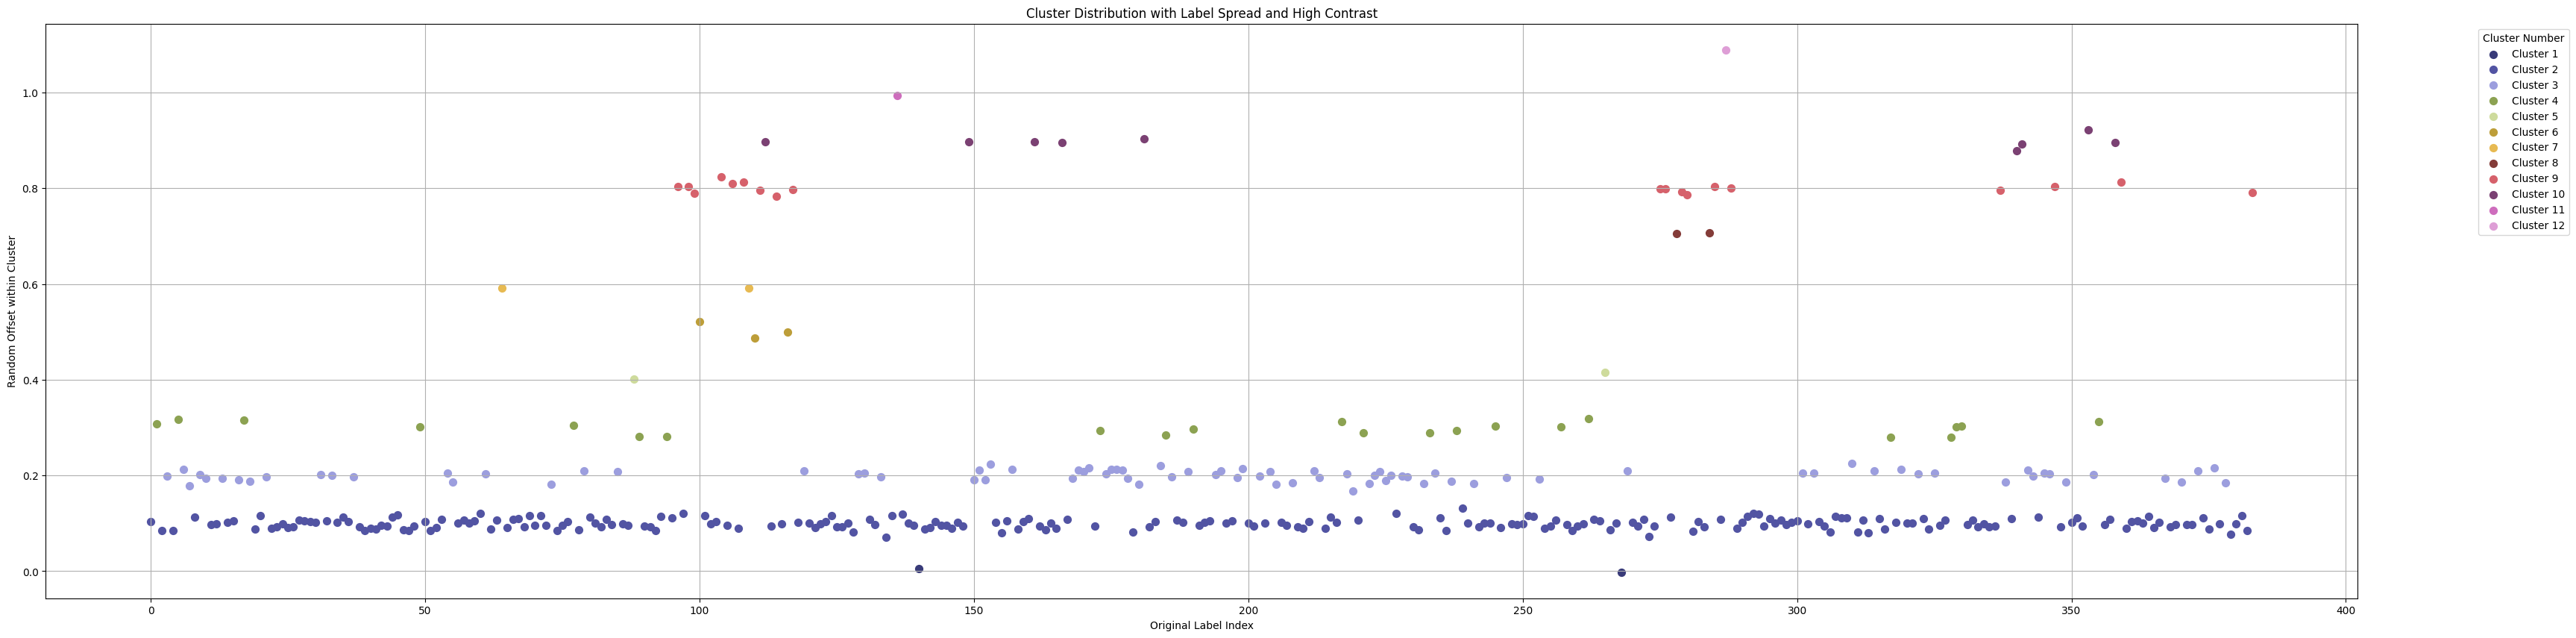

In [146]:
labels = np.arange(384) 


clusters_cross = plot_clusters(Z_cross, labels,cut_method='distance', cut_value=0.5)

Total number of clusters: 57


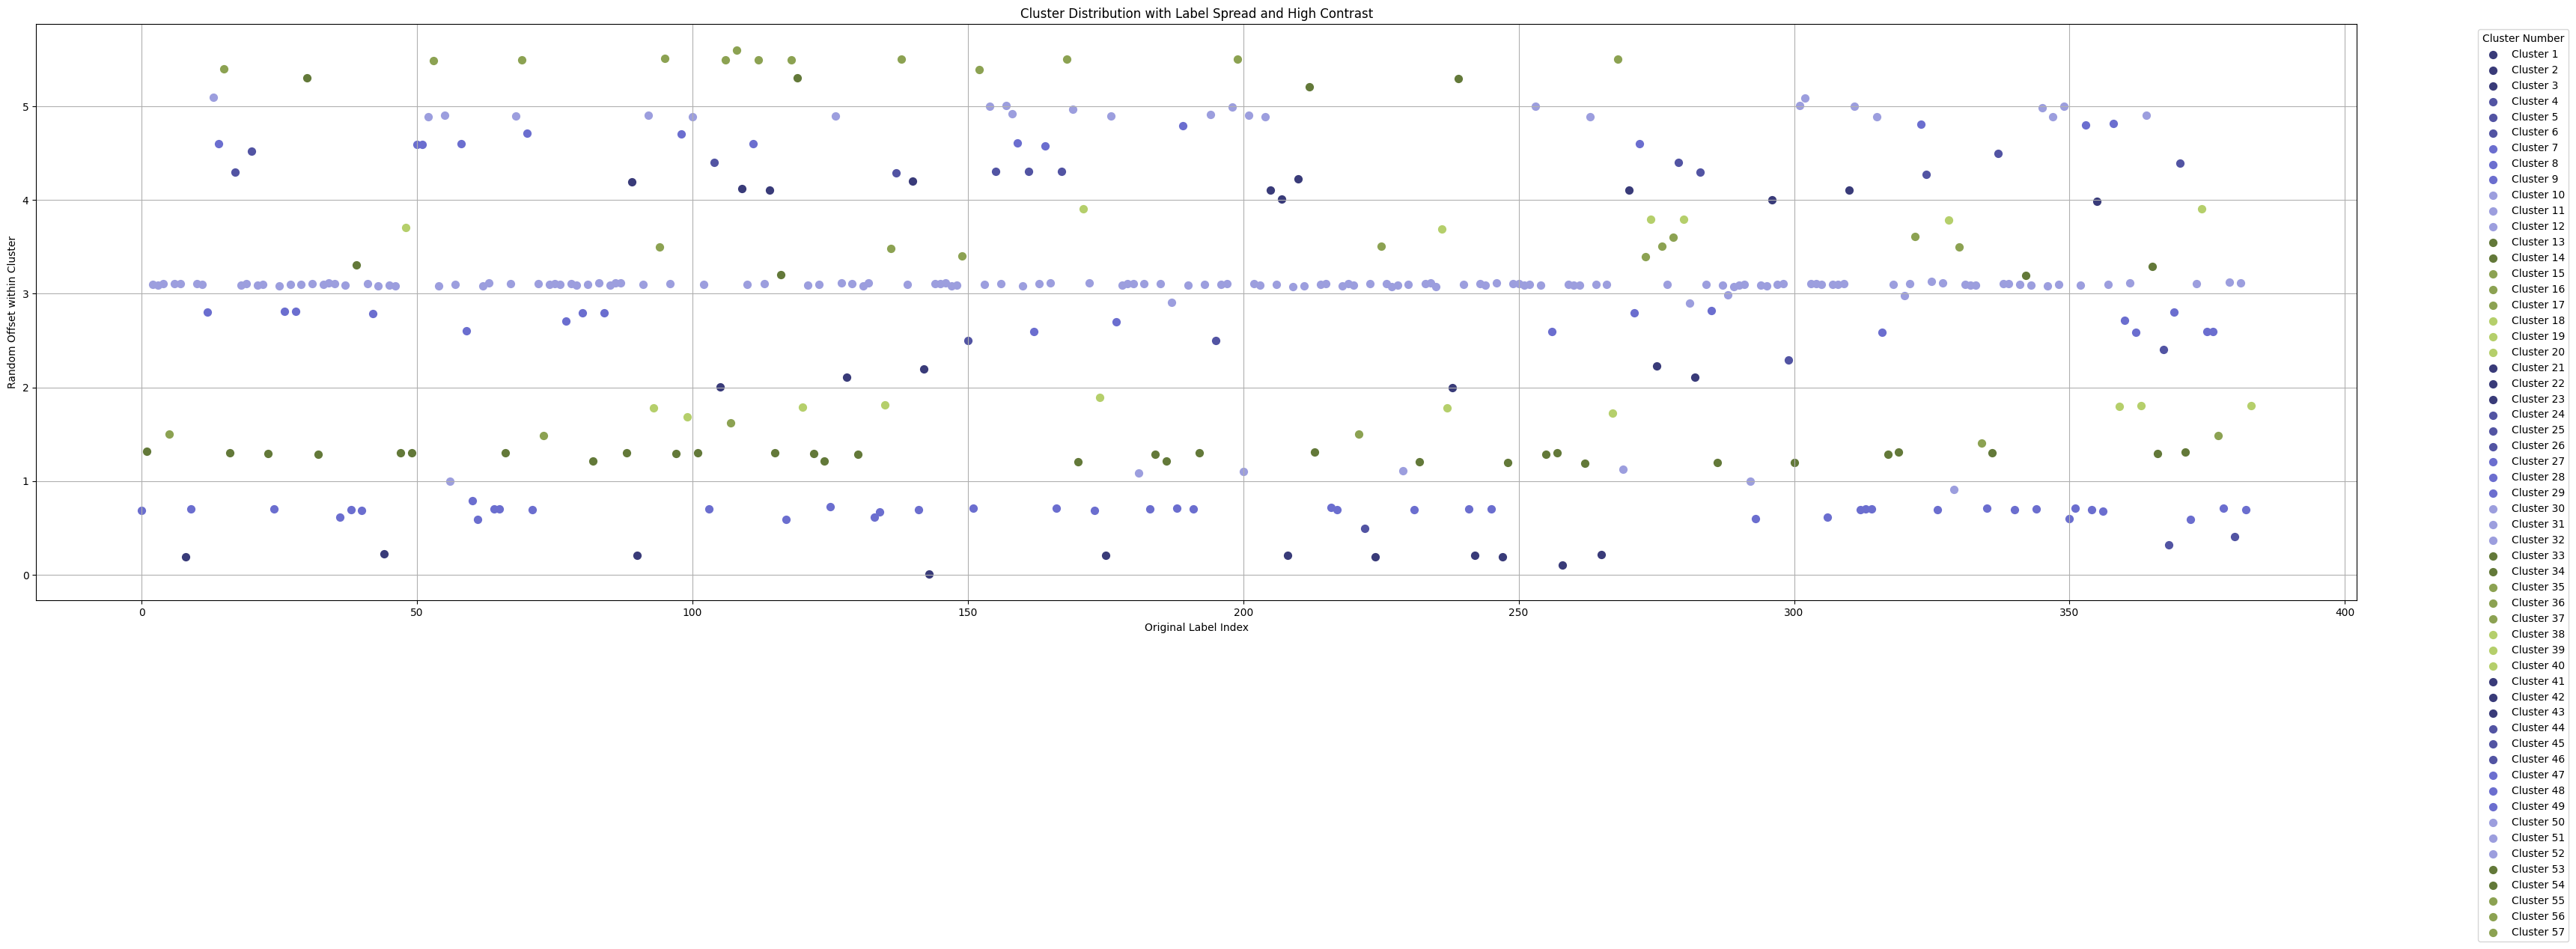

In [147]:
labels = np.arange(384) 


clusters_attn = plot_clusters(Z_attn, labels,cut_method='distance', cut_value=0.5)

In [148]:
reshaped_cluster_attn = clusters_attn.reshape(24, 16, order='F')
reshaped_cluster_attn

array([[ 8,  8, 38, 32, 32, 19, 32, 56, 14,  8, 32, 32, 31,  8, 14, 28],
       [14, 32, 14, 16, 14, 32, 32, 51, 32,  8,  8,  3, 32,  8, 46, 32],
       [32, 29, 47, 32, 48, 14, 32, 13, 50, 32,  3, 32, 32,  8, 32, 27],
       [32, 32, 47, 32, 18, 32, 32, 40, 26, 32, 32, 18, 32, 50, 32, 19],
       [32, 29, 50, 32, 50, 13, 32, 32, 32, 32, 32, 56, 11, 27,  8, 50],
       [16, 32, 56, 28, 14,  8, 35,  8, 32, 16,  8, 12,  7, 14, 32, 34],
       [32, 54, 32, 32, 32, 50, 26, 20, 51,  6, 32, 42, 32, 32, 33, 14],
       [32, 32, 50, 32,  8, 32,  8,  3, 56, 32,  3, 29, 32, 14, 32, 25],
       [ 3, 14, 11, 29, 45, 22, 55, 50, 12,  3, 13, 47, 41, 31,  8,  4],
       [ 8, 32, 32, 32, 21, 32, 32, 28, 50, 36, 32, 35, 32, 32, 51, 29],
       [32, 32, 47, 13, 56, 14, 51, 32, 32, 32, 32, 39, 32, 37, 32, 45],
       [32, 32, 27, 32, 17, 32, 44, 32, 32, 32, 32, 23, 24, 49, 50, 14],
       [29,  7,  9, 29, 57, 32, 32, 32, 50, 32, 32, 36, 13, 44, 32,  7],
       [52, 32,  7, 32, 42,  7, 51, 12, 42, 12, 51,

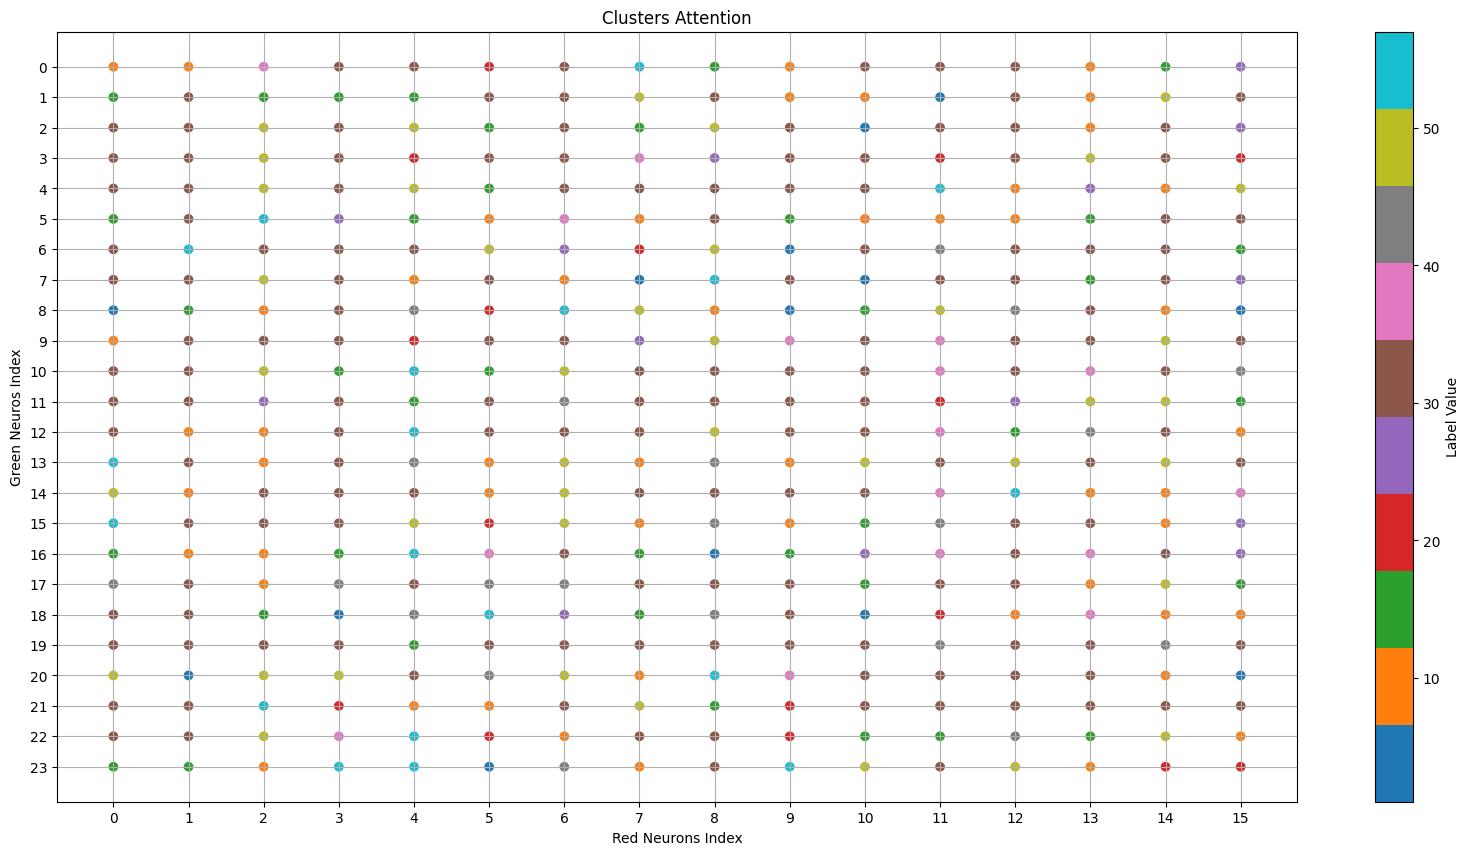

In [149]:

import numpy as np
import matplotlib.pyplot as plt

# Create an array of labels
labels = np.arange(384)

# Define the number of rows and columns
rows = 16
cols = 24

# Create X and Y coordinates for each label
x = labels % cols  # Column index for each label
y = labels // cols  # Row index for each label

# Plotting
plt.figure(figsize=(20, 10))
plt.scatter(y, x, c=clusters_attn, cmap='tab10')  # Color-coded by label value
plt.colorbar(label='Label Value')
plt.title('Clusters Attention')
plt.xlabel('Red Neurons Index')
plt.ylabel('Green Neuros Index')
plt.grid(True)
plt.xticks(np.arange(rows))
plt.yticks(np.arange(cols))
plt.gca().invert_yaxis() 
plt.show()

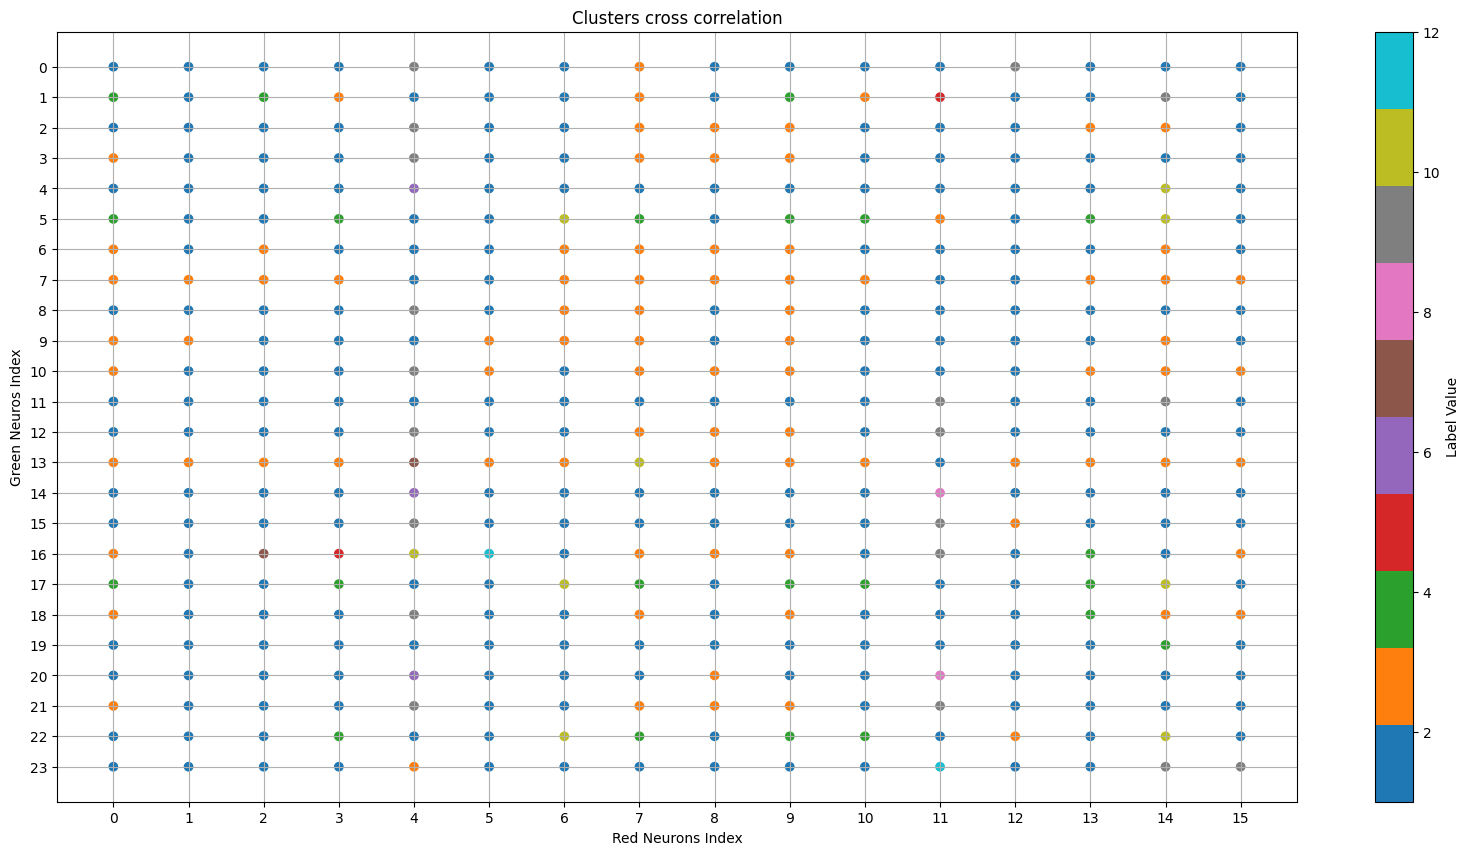

In [150]:

import numpy as np
import matplotlib.pyplot as plt

# Create an array of labels
labels = np.arange(384)

# Define the number of rows and columns
rows = 16
cols = 24

# Create X and Y coordinates for each label
x = labels % cols  # Column index for each label
y = labels // cols  # Row index for each label

# Plotting
plt.figure(figsize=(20, 10))
plt.scatter(y, x, c=clusters_cross, cmap='tab10')  # Color-coded by label value
plt.colorbar(label='Label Value')
plt.title('Clusters cross correlation')
plt.xlabel('Red Neurons Index')
plt.ylabel('Green Neuros Index')
plt.grid(True)
plt.xticks(np.arange(rows))
plt.yticks(np.arange(cols))
plt.gca().invert_yaxis() 
plt.show()

In [ ]:
def create_cluster_dic(num_cluster):
    cluster_group_attn = {}

    for i in range(len(clusters_attn)):
        cluster_group_attn[clusters_attn[i]] = []
        
    for key in cluster_group_attn.keys():
        for ind in range(len(labels)):
            if(clusters_attn[ind] == key):
                cluster_group_attn[key].append(ind)
                
    return cluster_group_attn 
            

In [ ]:
cluster_group_attn = create_cluster_dic(len(clusters_attn))
cluster_group_cross = create_cluster_dic(len(clusters_cross))

In [ ]:
cluster_list = list(cluster_group_attn.keys())
cluster_group_attn[1]

[39]

In [ ]:
def plot_exp_attn(patch_scores,pair_index):
    
    final_list_order = generate_patch_list(9)
    #final_list_order = final_list_order[::-1]
    pair = patch_scores.iloc[:,pair_index:pair_index+1]
    plt.figure(figsize=(20, 6))   
    plt.stem(final_list_order, pair,basefmt="")
    plt.title("Attn")
    plt.xlabel('Key')
    plt.ylabel('Average Value')
    plt.grid()
    #plt.savefig(f"attn_dfs_test/images/expAttn/{name}.png") 
    plt.show()

In [69]:
def plot_cross_of_cluster_attn(cluster_group_attn,cluster_index,patch_scores_df_a_base):
    test_clust = cluster_group_attn[cluster_index]

    for pair in test_clust:
        pair_index = pair
        print( f"Pair Index: {pair_index}")
        pair = get_column_pair(paired_df,pair_index)
        #plot_pair(pair)
        pair.columns[0] + pair.columns[1]
        l,c = compute_cross_corr(pair)
        c ,l= bin_and_average(c,5,l[0],l[-1])
        print(pair)
        plot_cross_corr(l,c)
        plot_exp_attn(patch_scores_df_a_base,pair_index)
        
        

Pair Index: 173
      cluster_8_red_s1_paired.5  cluster_6_green_s1_paired.7
0                     -1.172962                     0.384350
1                     -0.259382                     0.705937
2                     -0.356070                     1.218199
3                     -0.091689                     1.087576
4                      0.053443                     0.808523
...                         ...                          ...
1026                   0.225582                    -0.921857
1027                  -0.480749                    -0.882308
1028                  -0.608737                    -1.446234
1029                  -0.403663                    -1.028751
1030                  -0.980587                    -0.781665

[1031 rows x 2 columns]


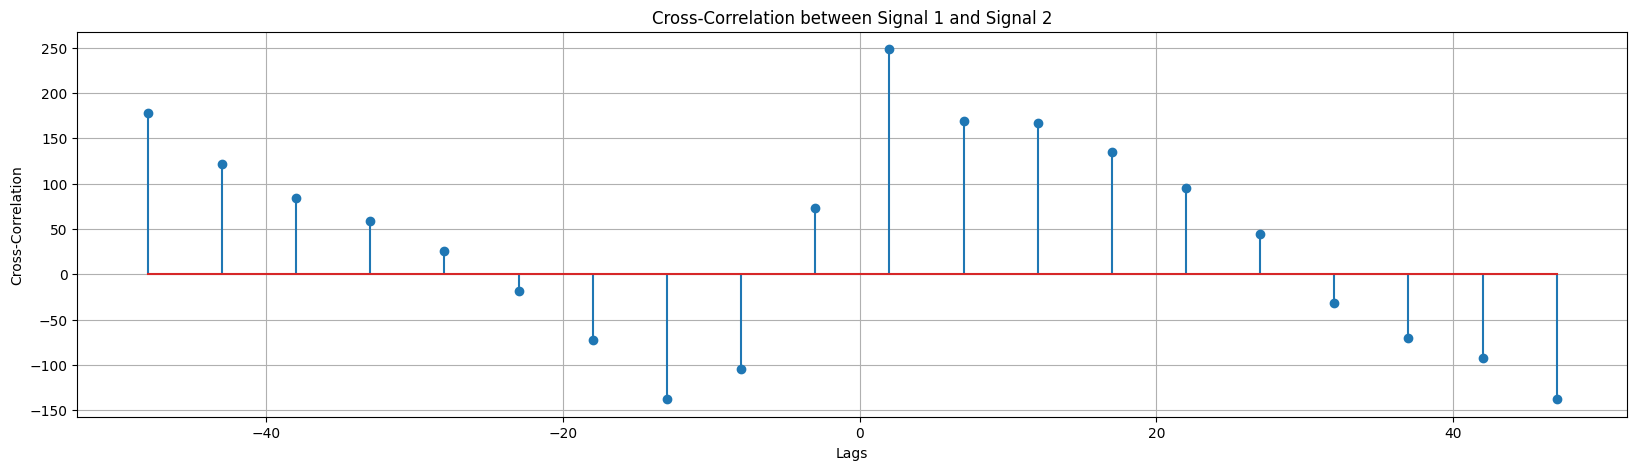

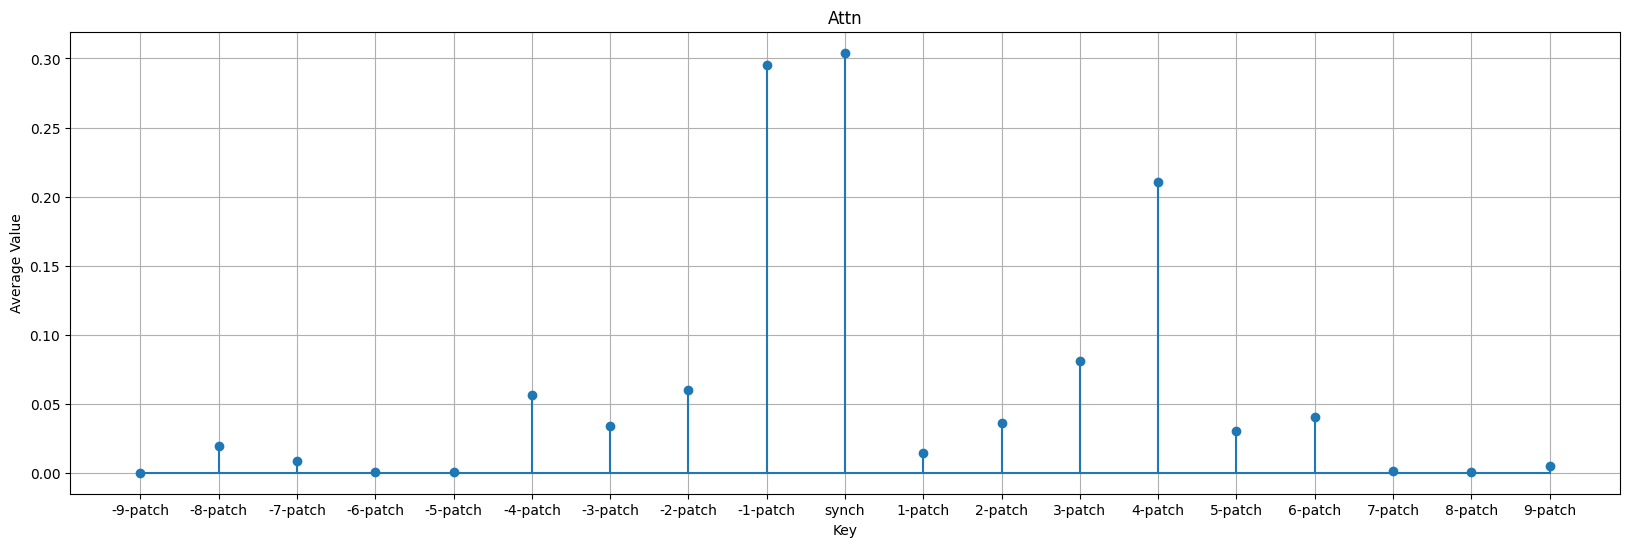

Pair Index: 244
      cluster_3_red_s2_paired.4  cluster_5_green_s1_paired.10
0                     -0.790880                     -1.087744
1                     -0.897569                      1.181213
2                     -0.696228                      1.374006
3                     -0.277919                      0.385875
4                     -1.316232                      0.018051
...                         ...                           ...
1026                  -0.123650                     -1.734120
1027                  -1.862256                     -1.116090
1028                  -0.787099                     -1.790913
1029                  -1.443955                     -0.639640
1030                  -1.600856                     -0.763367

[1031 rows x 2 columns]


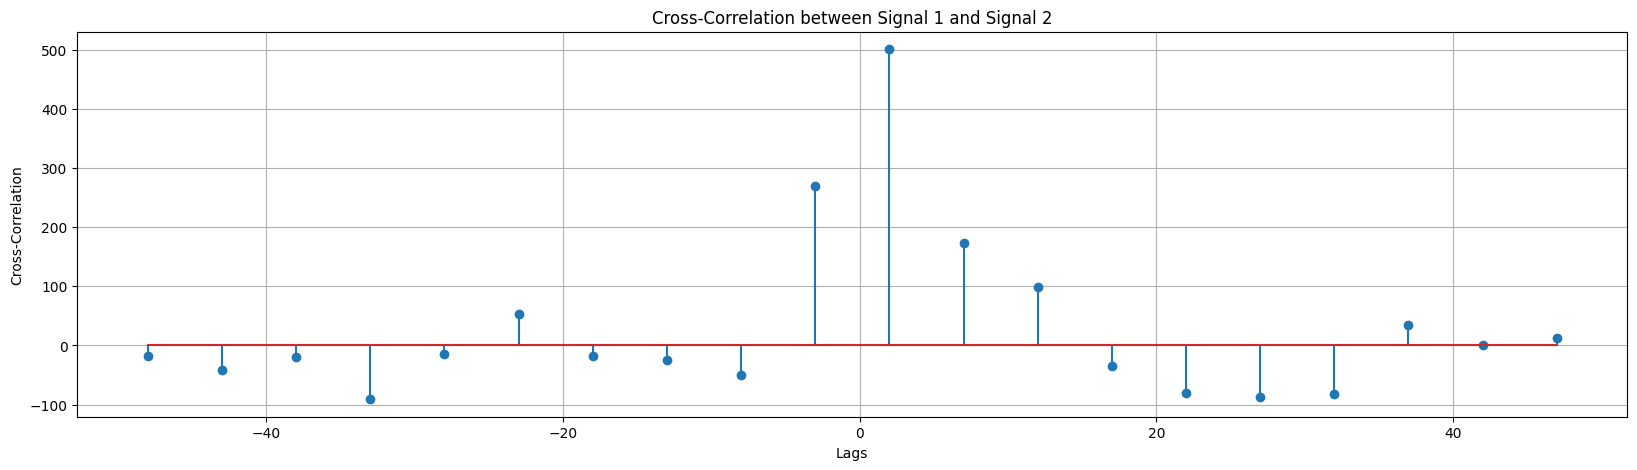

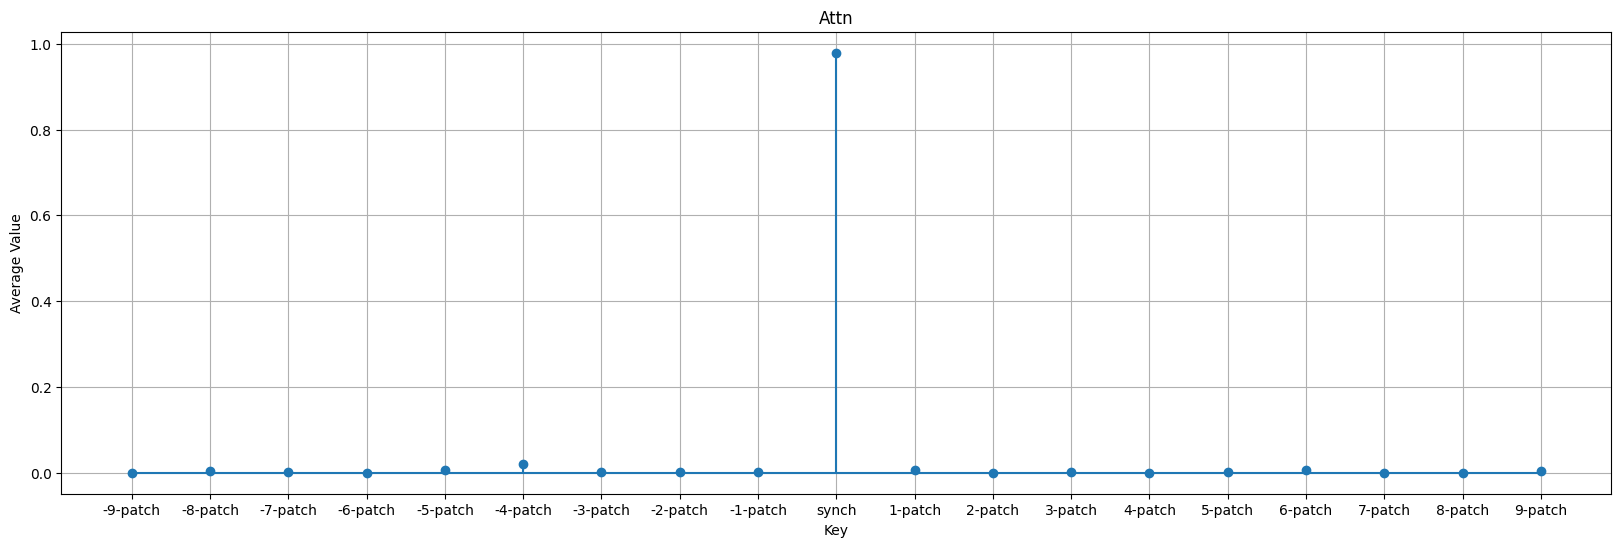

In [135]:
plot_cross_of_cluster_attn(cluster_group_attn,2,patch_scores_df_a_base_2_head)

In [70]:
def plot_cross_of_cluster_cross(cluster_group_cross,cluster_index,patch_scores_df_a_base):
    test_clust = cluster_group_cross[cluster_index]

    for pair in test_clust:
        pair_index = pair
        print( f"Pair Index: {pair_index}")
        pair = get_column_pair(paired_df,pair_index)
        #plot_pair(pair)
        pair.columns[0] + pair.columns[1]
        l,c = compute_cross_corr(pair)
        c ,l= bin_and_average(c,5,l[0],l[-1])
        print(pair)
        plot_cross_corr(l,c)
        plot_exp_attn(patch_scores_df_a_base,pair_index)

Pair Index: 269
      cluster_4_red_s2_paired.5  cluster_6_green_s1_paired.11
0                      0.323821                      0.384350
1                     -0.468991                      0.705937
2                      0.333804                      1.218199
3                     -0.032649                      1.087576
4                      0.437387                      0.808523
...                         ...                           ...
1026                  -1.103670                     -0.921857
1027                  -0.369501                     -0.882308
1028                  -0.425818                     -1.446234
1029                  -0.691911                     -1.028751
1030                  -1.401926                     -0.781665

[1031 rows x 2 columns]


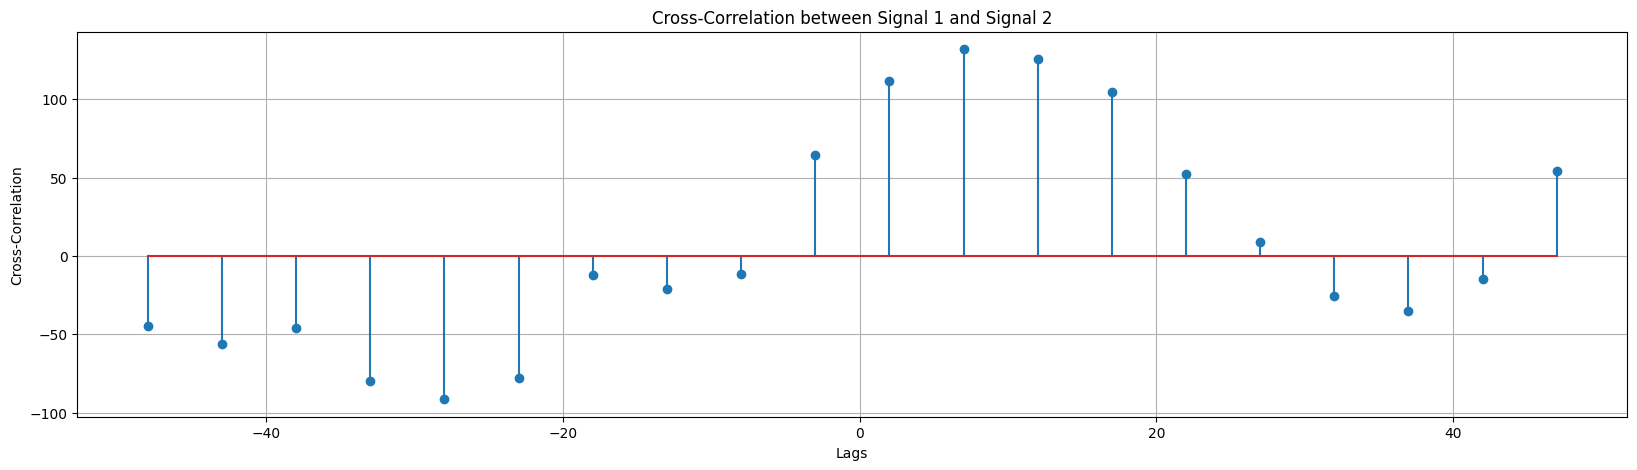

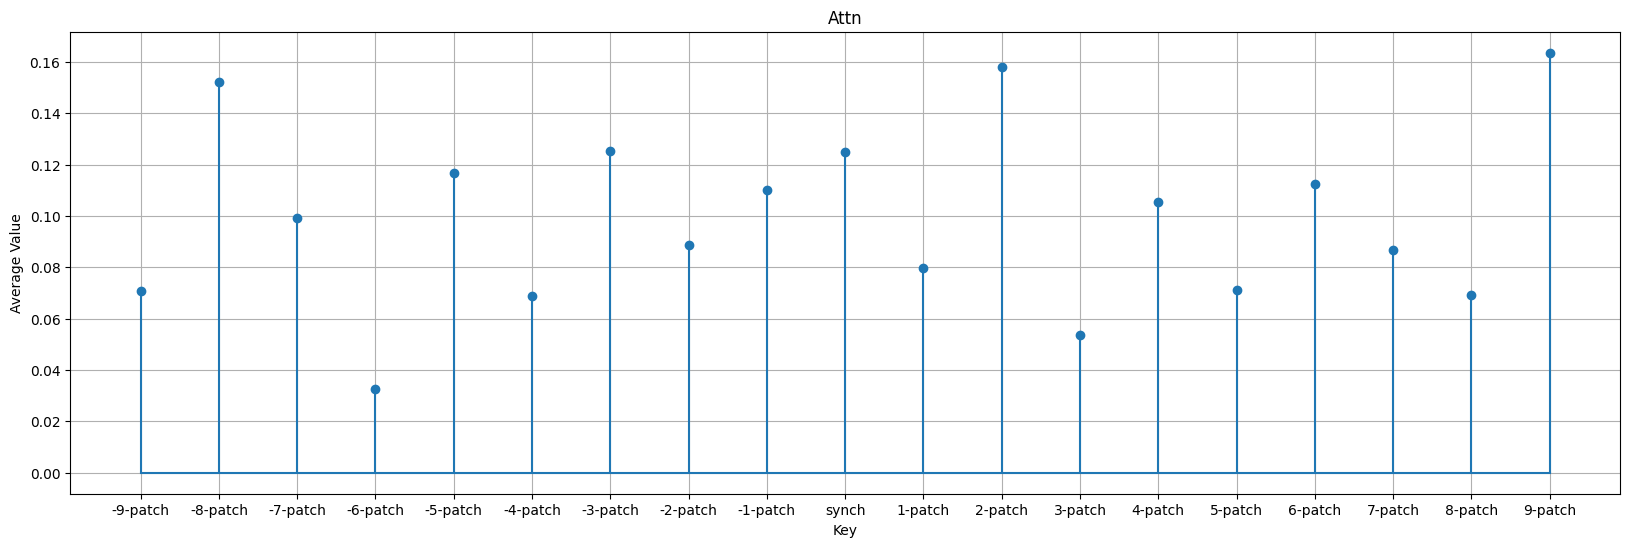

In [74]:
plot_cross_of_cluster_cross(cluster_group_cross,9,patch_scores_df_a_base_2_head)


# OTHER Manuell analysis

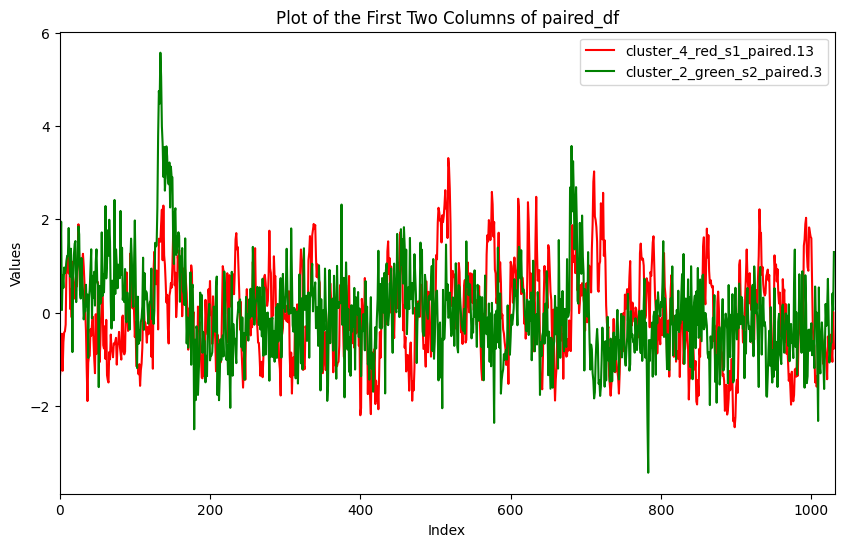

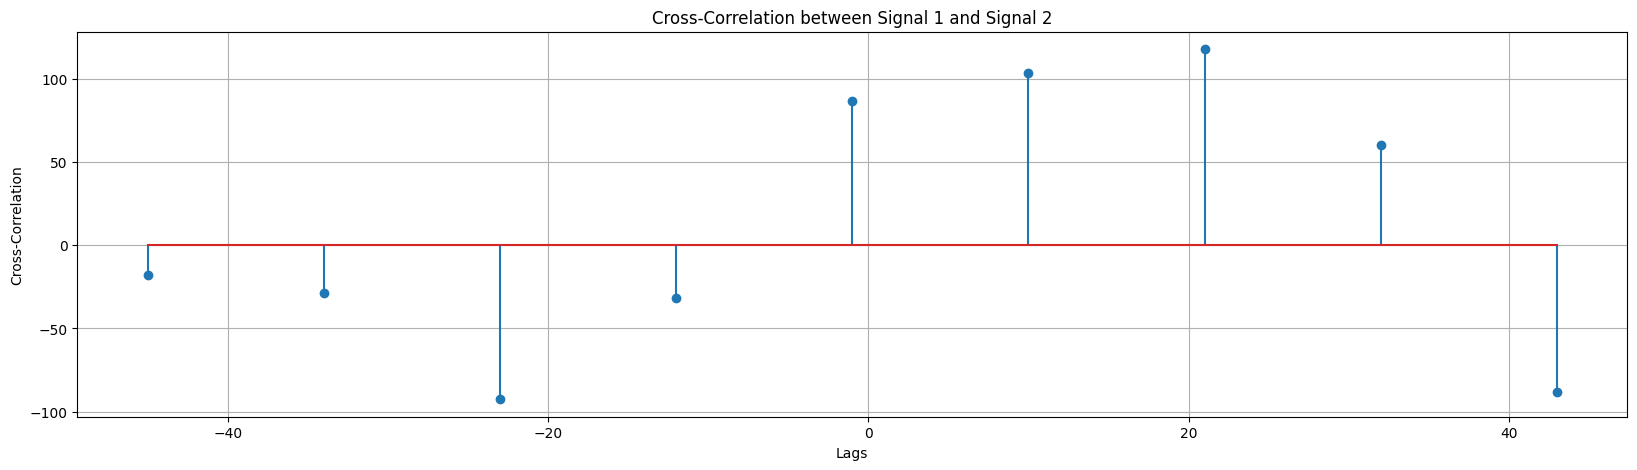

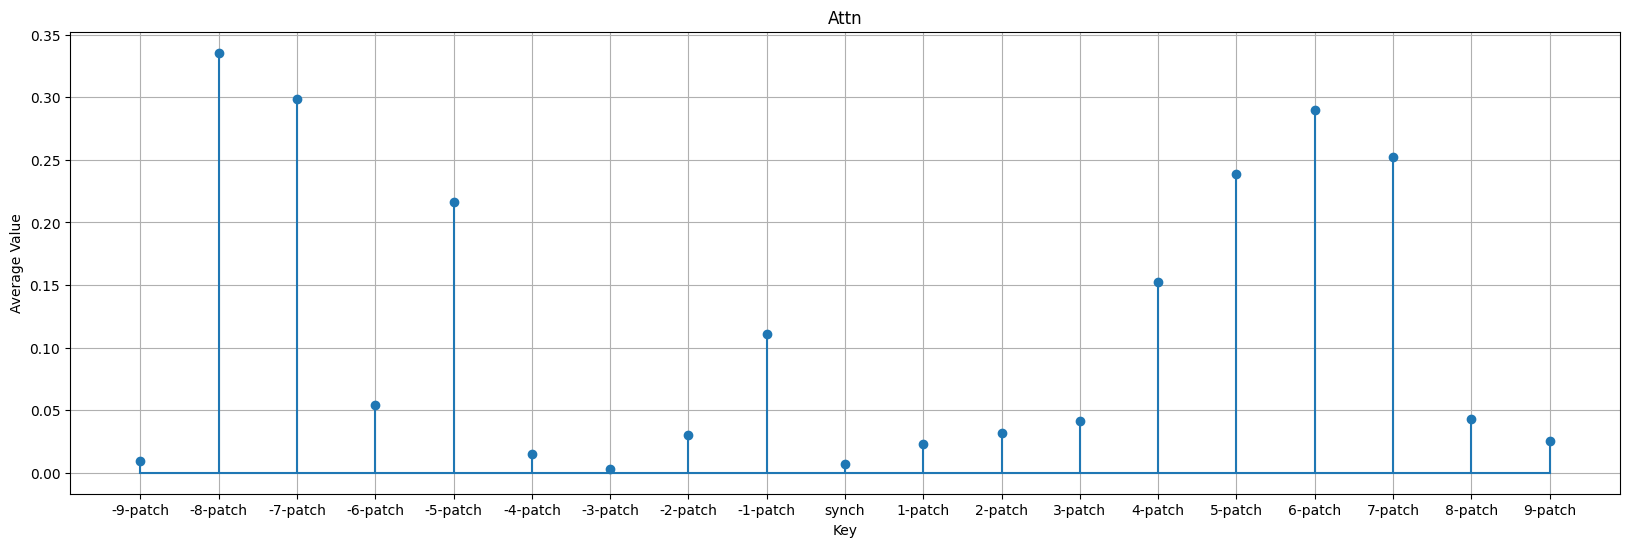

In [139]:
pair_index = 85
pair = get_column_pair(paired_df,pair_index)
plot_pair(pair)
pair.columns[0] + pair.columns[1]
l,c = compute_cross_corr(pair)
c ,l= bin_and_average(c,11,l[0],l[-1])
plot_cross_corr(l,c)
plot_exp_attn(patch_scores_df_a_base_TSA,pair_index)

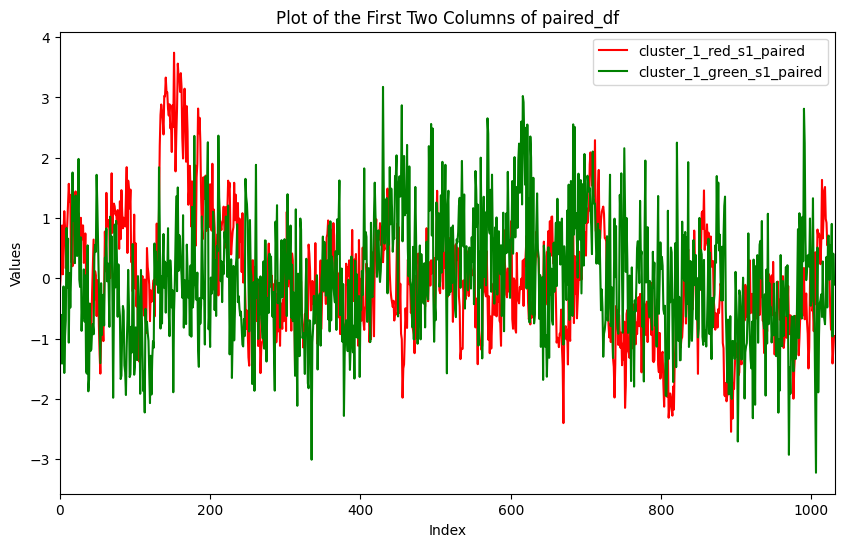

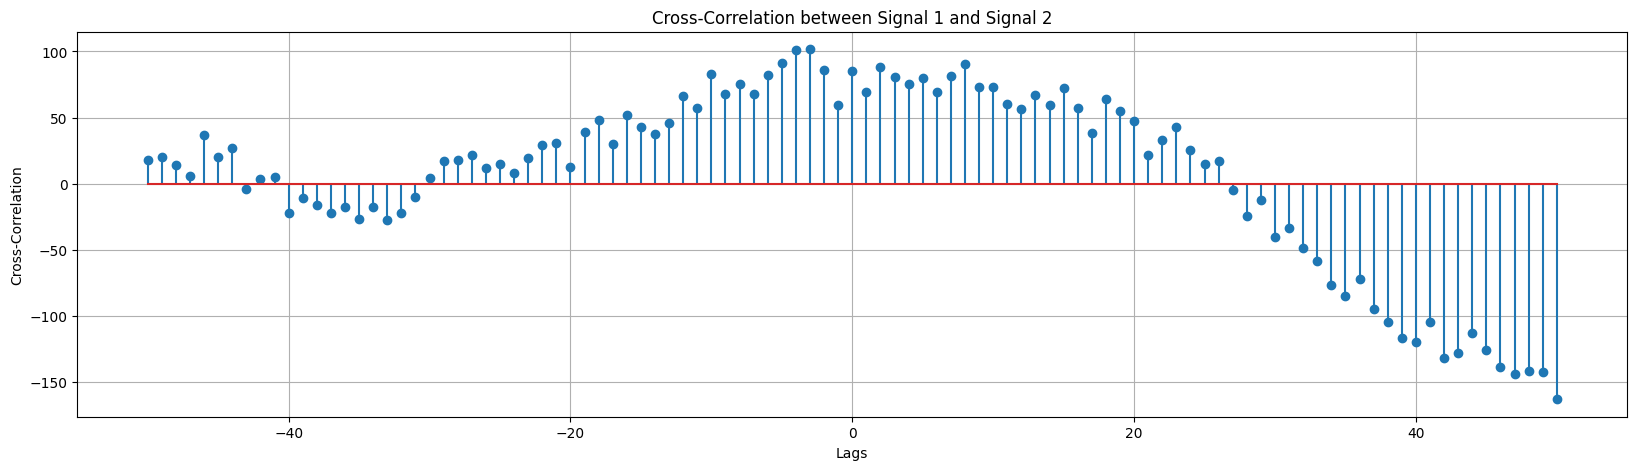

In [ ]:
pair_index = 0
pair = get_column_pair(paired_df,pair_index)
plot_pair(pair)
pair.columns[0] + pair.columns[1]
l,c = compute_cross_corr(pair)
plot_cross_corr(l,c)